In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error,r2_score
import math
import copy

In [2]:
# Loading data set
Base_Data=pd.read_csv('train.csv')

# Variable Understanding

- MSSubClass :  Identifies the type of dwelling involved in the sale.
- MSZoning :  Identifies the general zoning classification of the sale.
- LotFrontage :  Linear feet of street connected to property
- LotArea :  Lot size in square feet
- Street :  Type of road access to property
- Alley :  Type of alley access to property
- LotShape :  General shape of property
- LandContour :  Flatness of the property
- Utilities :  Type of utilities available
- LotConfig :  Lot configuration
- LandSlope :  Slope of property
- Neighborhood :  Physical locations within Ames city limits
- Condition1 :  Proximity to various conditions
- Condition2 :  Proximity to various conditions (if more than one is present)
- BldgType :  Type of dwelling
- HouseStyle :  Style of dwelling
- OverallQual :  Rates the overall material and finish of the house
- OverallCond :  Rates the overall condition of the house
- YearBuilt :  Original construction date
- YearRemodAdd :  Remodel date (same as construction date if no remodeling or additions)
- RoofStyle :  Type of roof
- RoofMatl :  Roof material
- Exterior1st :  Exterior covering on house
- Exterior2nd :  Exterior covering on house (if more than one material)
- MasVnrType :  Masonry veneer type
- MasVnrArea :  Masonry veneer area in square feet
- ExterQual :  Evaluates the quality of the material on the exterior 
- ExterCond :  Evaluates the present condition of the material on the exterior
- Foundation :  Type of foundation
- BsmtQual :  Evaluates the height of the basement
- BsmtCond :  Evaluates the general condition of the basement
- BsmtExposure :  Refers to walkout or garden level walls
- BsmtFinType1 :  Rating of basement finished area
- BsmtFinSF1 :  Type 1 finished square feet
- BsmtFinType2 :  Rating of basement finished area (if multiple types)
- BsmtFinSF2 :  Type 2 finished square feet
- BsmtUnfSF :  Unfinished square feet of basement area
- TotalBsmtSF :  Total square feet of basement area
- Heating :  Type of heating
- HeatingQC :  Heating quality and condition
- CentralAir :  Central air conditioning
- Electrical :  Electrical system
- 1stFlrSF :  First Floor square feet
- 2ndFlrSF :  Second floor square feet
- LowQualFinSF :  Low quality finished square feet (all floors)
- GrLivArea :  Above grade (ground) living area square feet
- BsmtFullBath :  Basement full bathrooms
- BsmtHalfBath :  Basement half bathrooms
- FullBath :  Full bathrooms above grade
- HalfBath :  Half baths above grade
- Bedroom :  Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen :  Kitchens above grade
- KitchenQual :  Kitchen quality
- TotRmsAbvGrd :  Total rooms above grade (does not include bathrooms)
- Functional :  Home functionality (Assume typical unless deductions are warranted)
- Fireplaces :  Number of fireplaces
- FireplaceQu :  Fireplace quality
- GarageType :  Garage location
- GarageYrBlt :  Year garage was built
- GarageFinish :  Interior finish of the garage
- GarageCars :  Size of garage in car capacity
- GarageArea :  Size of garage in square feet
- GarageQual :  Garage quality
- GarageCond :  Garage condition
- PavedDrive :  Paved driveway
- WoodDeckSF :  Wood deck area in square feet
- OpenPorchSF :  Open porch area in square feet
- EnclosedPorch :  Enclosed porch area in square feet
- 3SsnPorch :  Three season porch area in square feet
- ScreenPorch :  Screen porch area in square feet
- PoolArea :  Pool area in square feet
- PoolQC :  Pool quality
- Fence :  Fence quality
- MiscFeature :  Miscellaneous feature not covered in other categories
- MiscVal :  Value of miscellaneous feature
- MoSold :  Month Sold (MM)
- YrSold :  Year Sold (YYYY)
- SaleType :  Type of sale
- SaleCondition :  Condition of sale

In [3]:
# checking shape of the data
Base_Data.shape

(1460, 81)

In [4]:
# Checking head of data set
Base_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Dropping ID variables
Base_Data.drop(['Id'],inplace=True,axis=1)

# Dropping sales variable
Base_Data.drop(['SaleType', 'SaleCondition'],inplace=True,axis=1)

In [6]:
Base_Data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# checking event variables
print(Base_Data['SalePrice'].describe())
print(Base_Data.shape)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
(1460, 78)


In [8]:
# Checking Null value in the data set
print(Base_Data.isnull().mean()[Base_Data.isnull().mean()>0])

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


In [9]:
# dropping all the variables having missing rate greater than equal to 80%
print(Base_Data.isnull().mean()[Base_Data.isnull().mean()>=.8])
Base_Data.drop(list(Base_Data.isnull().mean()[Base_Data.isnull().mean()>=.8].index),axis=1,inplace=True)

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64


In [10]:
# checking shape and remaining missing rate
print(Base_Data.shape)
print(Base_Data.isnull().mean()[Base_Data.isnull().mean()>0])

(1460, 74)
LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64


In [11]:
# Comibing MSSubClass based on median value of sale
# creating 4 categories out of it

a=Base_Data.groupby(['MSSubClass']).agg({'SalePrice':'median'}).reset_index(drop=False).sort_values(by='SalePrice')
a['SalePrice_bckt']=pd.cut(a['SalePrice'],[0,100000,150000,200000,np.Inf])
a['MSSubClass']=a['MSSubClass'].astype('str')
a['MSSubClass_combine']=a.groupby(['SalePrice_bckt'])['MSSubClass'].transform(lambda x:",".join(x))
a['MSSubClass']=a['MSSubClass'].astype('int64')

Base_Data=pd.merge(Base_Data,a[['MSSubClass','MSSubClass_combine']],how="left",on="MSSubClass")
Base_Data.drop(['MSSubClass'],axis=1,inplace=True)

In [12]:
# YearRemodAdd
# GarageYrBlt
# MoSold
# YrSold
# YearBuilt

Base_Data['How_Old_Building_Is']=Base_Data['YrSold']-Base_Data['YearRemodAdd']
Base_Data['How_Old_Garage_Is']=Base_Data['YrSold']-Base_Data['GarageYrBlt']
Base_Data.drop(['YearRemodAdd','GarageYrBlt','MoSold','YrSold','YearBuilt'],axis=1,inplace=True)

In [13]:
Base_Data.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorc

# Univariate Analysis

------------------------------------
------------------------------------
Univariate analysis for LotFrontage Variable.


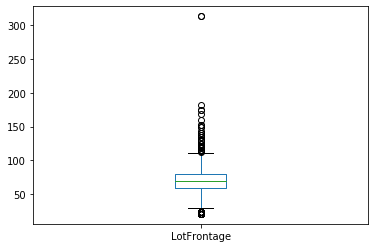

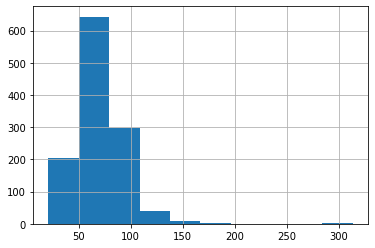

Number of Outlier according to IQR :- 0.0 %
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for LotArea Variable.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


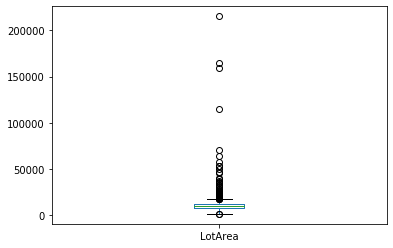

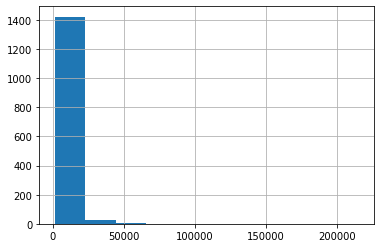

Number of Outlier according to IQR :- 4.726027397260274 %
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for OverallQual Variable.


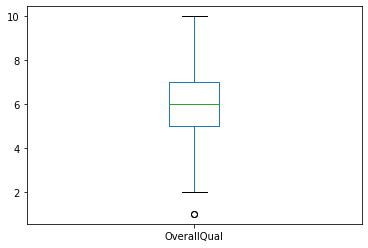

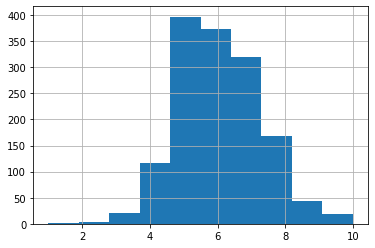

Number of Outlier according to IQR :- 0.136986301369863 %
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for OverallCond Variable.


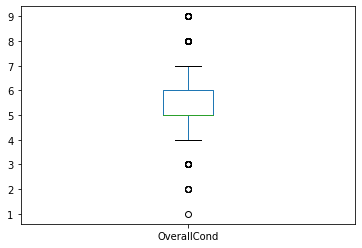

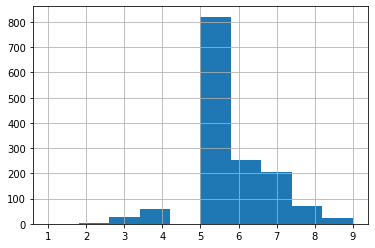

Number of Outlier according to IQR :- 8.561643835616438 %
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for MasVnrArea Variable.


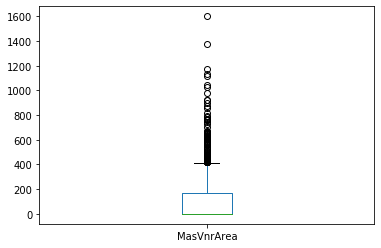

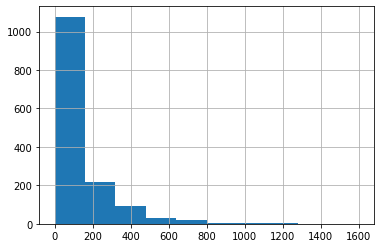

Number of Outlier according to IQR :- 0.0 %
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for BsmtFinSF1 Variable.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


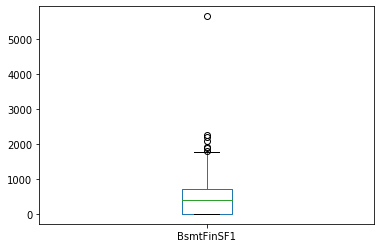

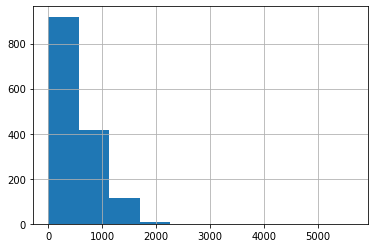

Number of Outlier according to IQR :- 0.4794520547945205 %
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for BsmtFinSF2 Variable.


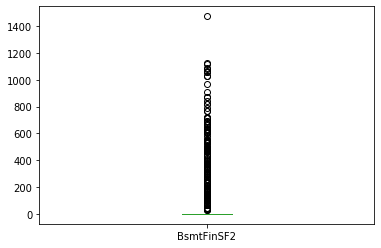

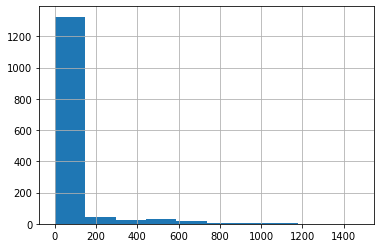

Number of Outlier according to IQR :- 11.438356164383562 %
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for BsmtUnfSF Variable.


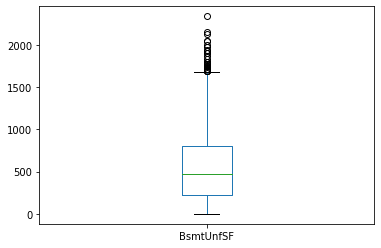

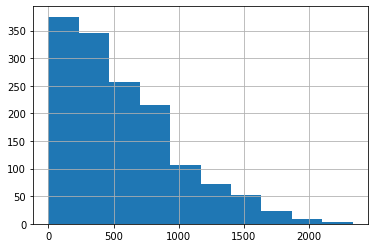

Number of Outlier according to IQR :- 1.9863013698630136 %
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for TotalBsmtSF Variable.


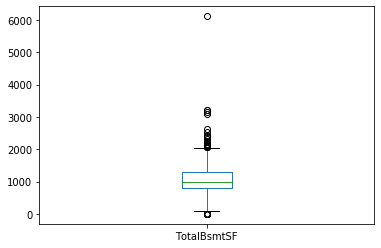

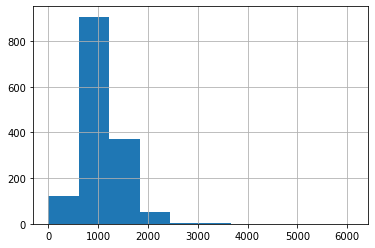

Number of Outlier according to IQR :- 4.178082191780822 %
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for 1stFlrSF Variable.


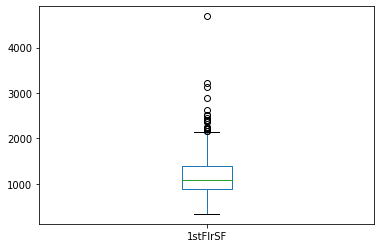

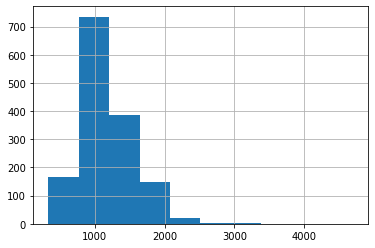

Number of Outlier according to IQR :- 1.36986301369863 %
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for 2ndFlrSF Variable.


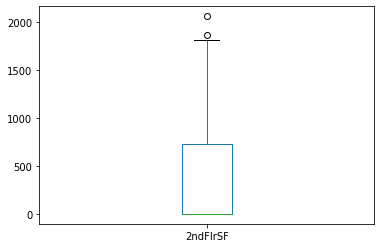

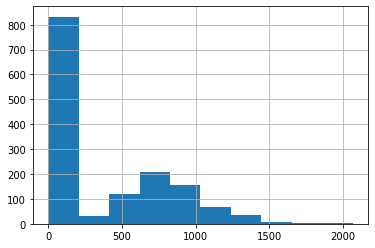

Number of Outlier according to IQR :- 0.136986301369863 %
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for LowQualFinSF Variable.


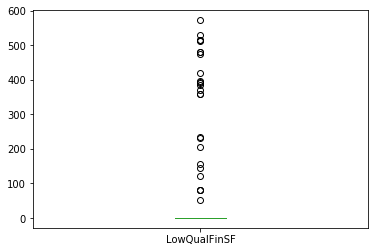

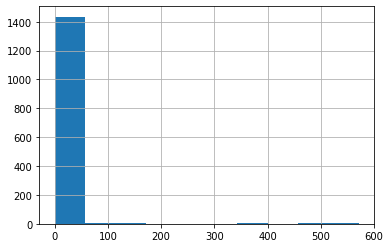

Number of Outlier according to IQR :- 1.7808219178082192 %
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for GrLivArea Variable.


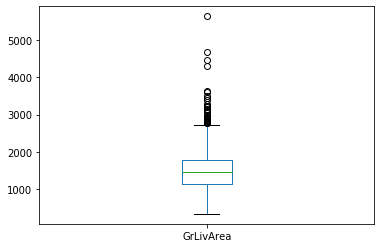

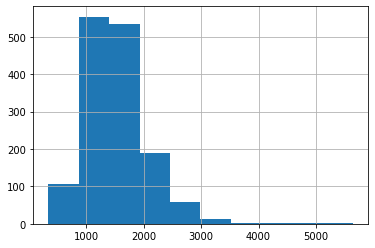

Number of Outlier according to IQR :- 2.1232876712328768 %
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for BsmtFullBath Variable.


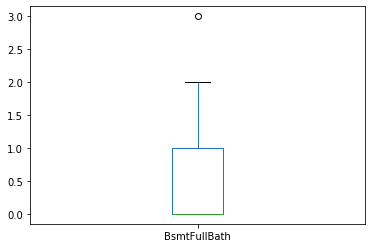

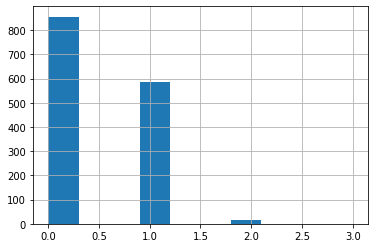

Number of Outlier according to IQR :- 0.0684931506849315 %
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for BsmtHalfBath Variable.


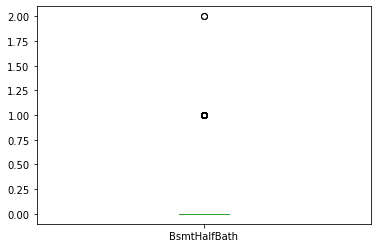

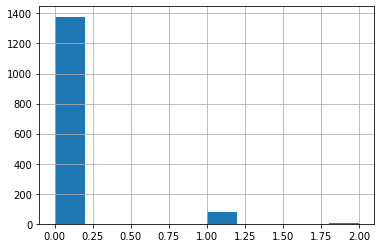

Number of Outlier according to IQR :- 5.616438356164384 %
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for FullBath Variable.


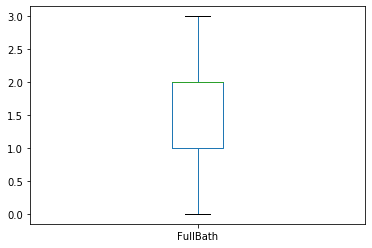

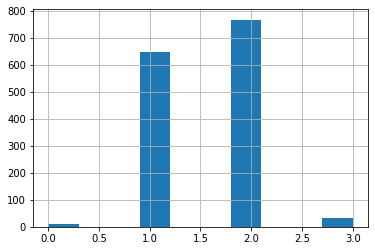

Number of Outlier according to IQR :- 0.0 %
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for HalfBath Variable.


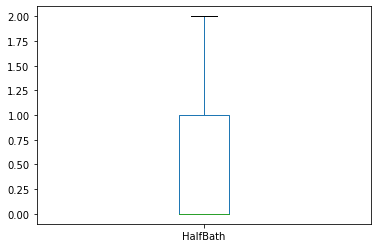

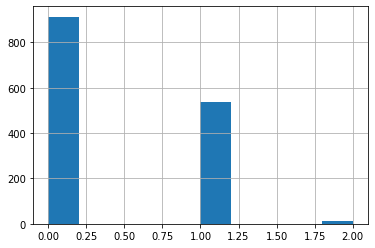

Number of Outlier according to IQR :- 0.0 %
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for BedroomAbvGr Variable.


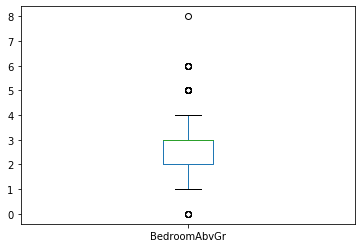

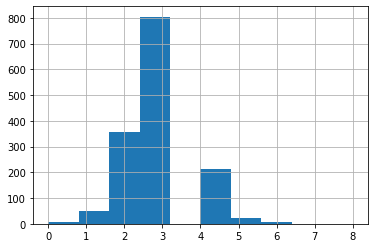

Number of Outlier according to IQR :- 2.3972602739726026 %
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for KitchenAbvGr Variable.


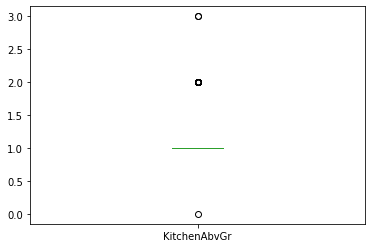

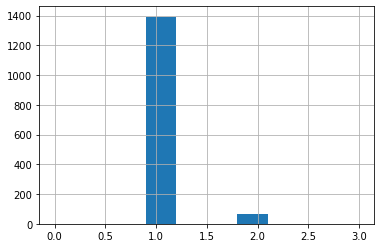

Number of Outlier according to IQR :- 4.657534246575342 %
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for TotRmsAbvGrd Variable.


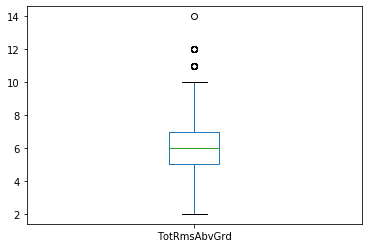

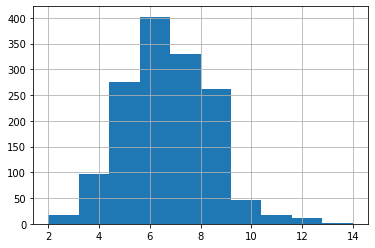

Number of Outlier according to IQR :- 2.0547945205479454 %
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for Fireplaces Variable.


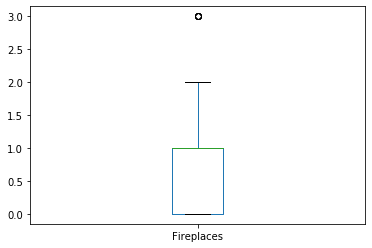

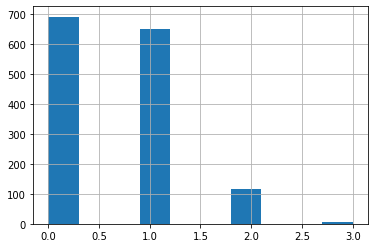

Number of Outlier according to IQR :- 0.3424657534246575 %
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for GarageCars Variable.


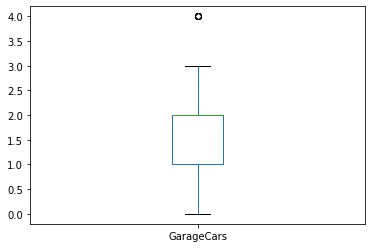

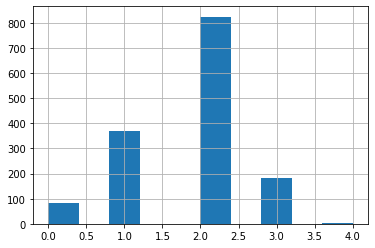

Number of Outlier according to IQR :- 0.3424657534246575 %
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for GarageArea Variable.


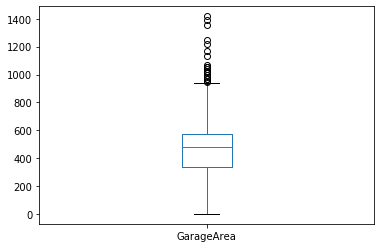

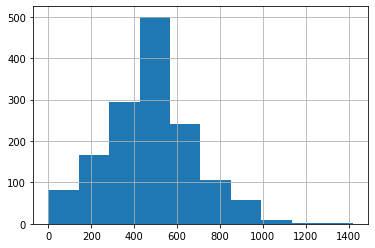

Number of Outlier according to IQR :- 1.4383561643835616 %
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for WoodDeckSF Variable.


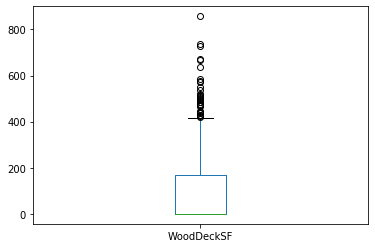

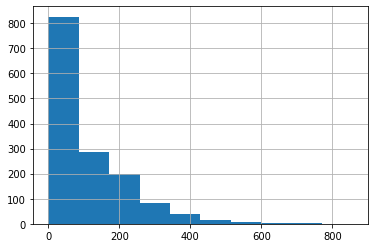

Number of Outlier according to IQR :- 2.191780821917808 %
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for OpenPorchSF Variable.


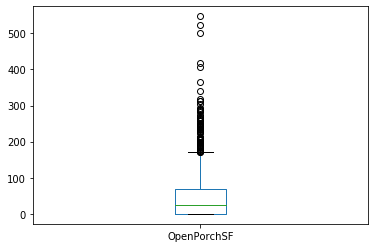

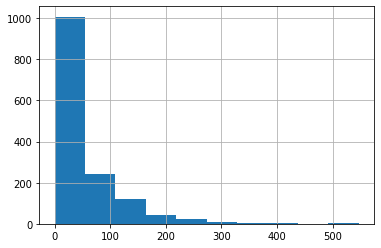

Number of Outlier according to IQR :- 5.273972602739726 %
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for EnclosedPorch Variable.


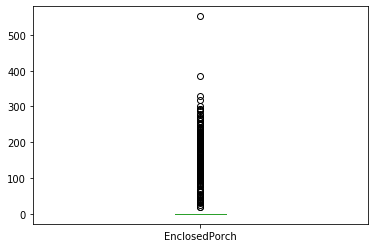

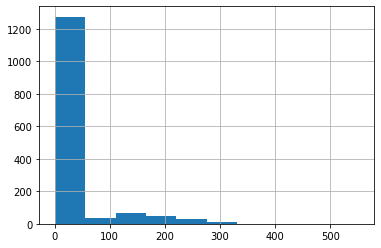

Number of Outlier according to IQR :- 14.246575342465754 %
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for 3SsnPorch Variable.


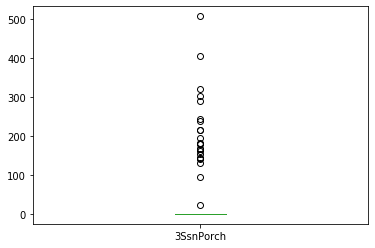

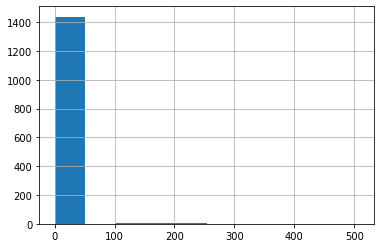

Number of Outlier according to IQR :- 1.643835616438356 %
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for ScreenPorch Variable.


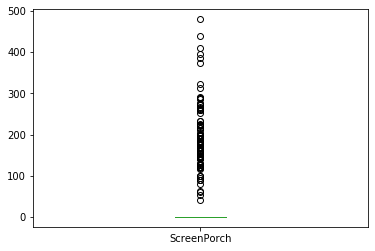

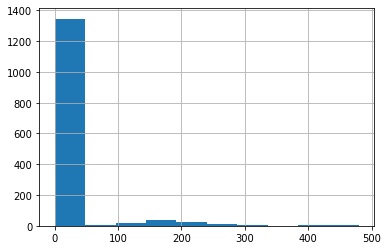

Number of Outlier according to IQR :- 7.945205479452055 %
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for PoolArea Variable.


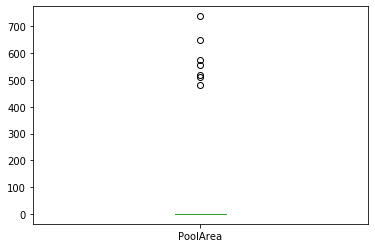

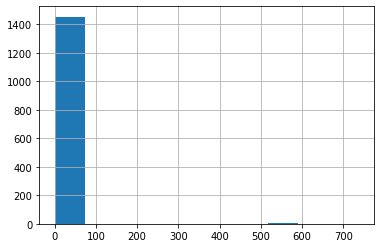

Number of Outlier according to IQR :- 0.4794520547945205 %
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for MiscVal Variable.


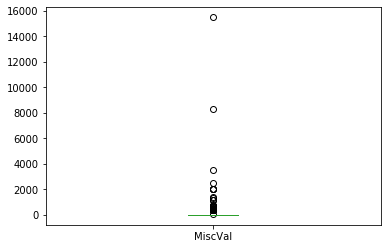

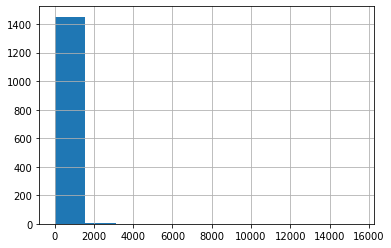

Number of Outlier according to IQR :- 3.5616438356164384 %
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for SalePrice Variable.


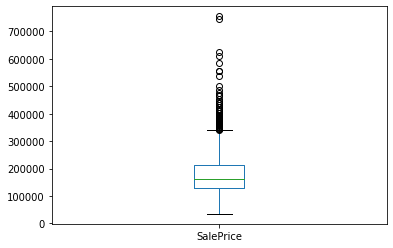

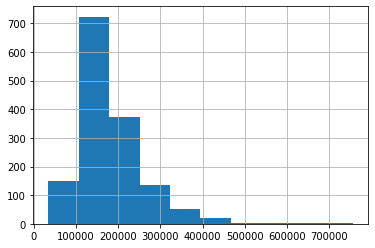

Number of Outlier according to IQR :- 4.178082191780822 %
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for How_Old_Building_Is Variable.


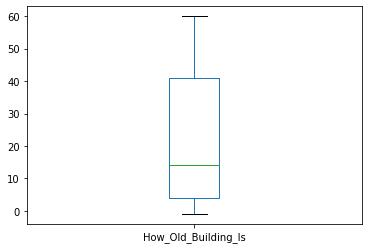

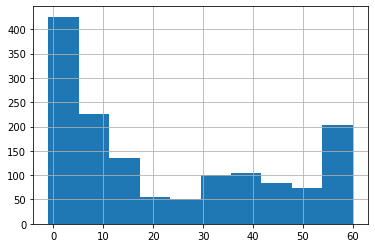

Number of Outlier according to IQR :- 0.0 %
count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: How_Old_Building_Is, dtype: float64
------------------------------------
------------------------------------
Univariate analysis for How_Old_Garage_Is Variable.


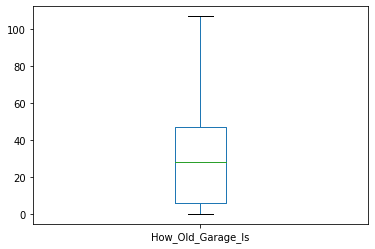

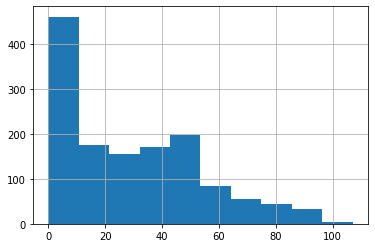

Number of Outlier according to IQR :- 0.0 %
count    1379.000000
mean       29.306019
std        24.726881
min         0.000000
25%         6.000000
50%        28.000000
75%        47.000000
max       107.000000
Name: How_Old_Garage_Is, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [14]:
# For all the int data type plotting box plot and histogram to show the spread of the variables and mean,median,max,min,25%,75%.
# Dropping null variable of the variable while plotting the curve. :- This will taken care in plot function of pandas

# Not selecting id and member id
for i in Base_Data.columns:
    if Base_Data[i].dtypes in ['int64',float]:
        print("------------------------------------")
        print("------------------------------------")
        print("Univariate analysis for "+i+" Variable.")
        Base_Data[i].plot(kind="box")
        plt.show()
        Base_Data[i].hist()
        plt.show()
        q3, q1 = np.percentile(Base_Data[i], [75 ,25])
        iqr = q3 - q1
        upr=q3 + (1.5 * iqr)
        lwr=q1 - (1.5 * iqr)
        print("Number of Outlier according to IQR :- "+str((sum((Base_Data[i]<lwr) | (Base_Data[i]>upr)))*100/len(Base_Data)),"%")
        print(Base_Data[i].describe())

------------------------------------
------------------------------------
Univariate analysis for MSZoning Variable.


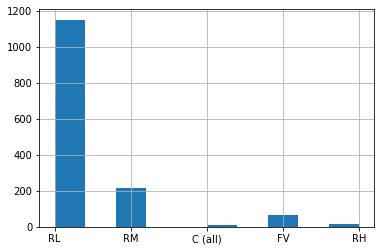

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Street Variable.


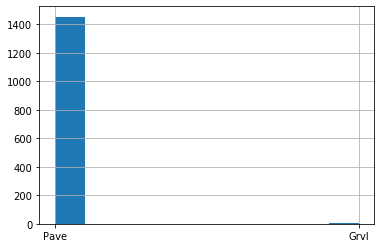

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
------------------------------------
------------------------------------
Univariate analysis for LotShape Variable.


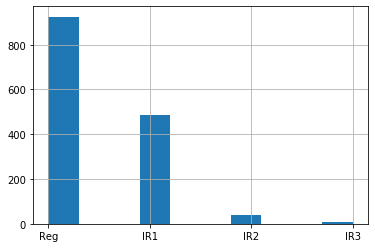

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
------------------------------------
------------------------------------
Univariate analysis for LandContour Variable.


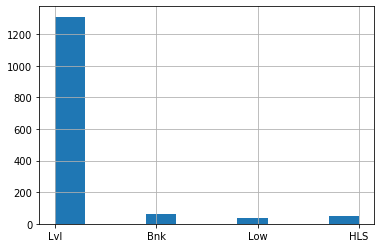

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Utilities Variable.


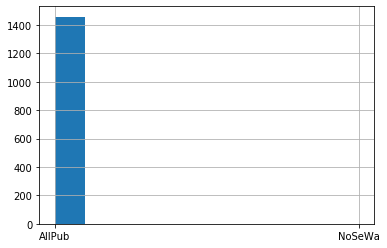

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
------------------------------------
------------------------------------
Univariate analysis for LotConfig Variable.


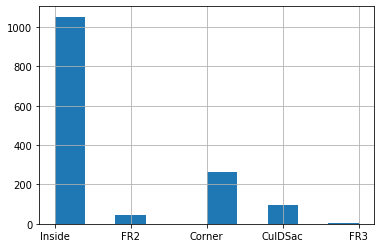

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
------------------------------------
------------------------------------
Univariate analysis for LandSlope Variable.


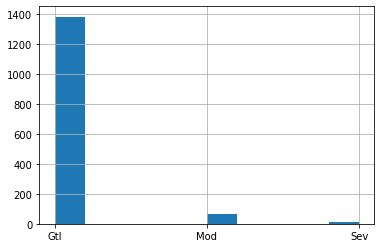

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Neighborhood Variable.


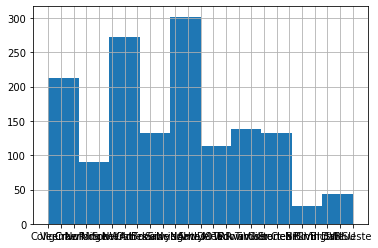

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Condition1 Variable.


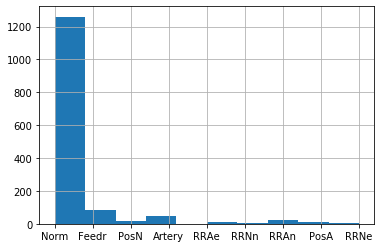

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Condition2 Variable.


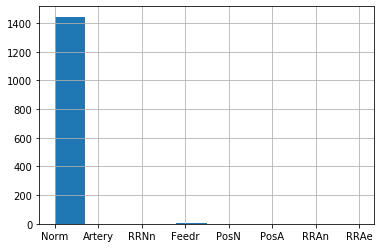

count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object
------------------------------------
------------------------------------
Univariate analysis for BldgType Variable.


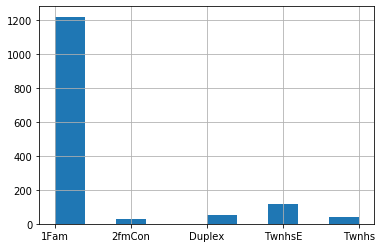

count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object
------------------------------------
------------------------------------
Univariate analysis for HouseStyle Variable.


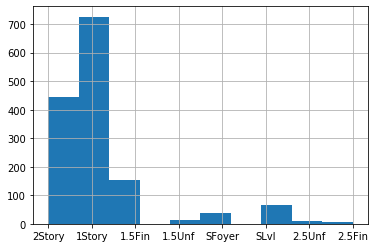

count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object
------------------------------------
------------------------------------
Univariate analysis for RoofStyle Variable.


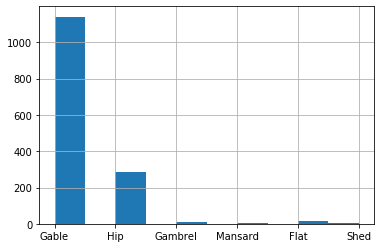

count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object
------------------------------------
------------------------------------
Univariate analysis for RoofMatl Variable.


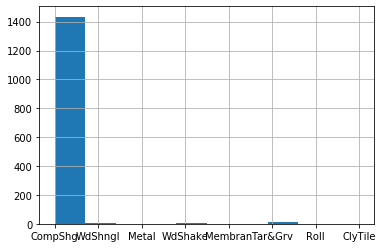

count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Exterior1st Variable.


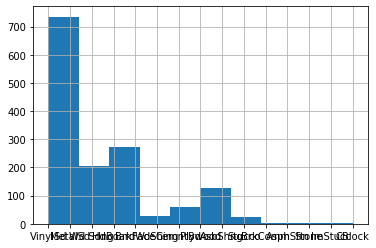

count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Exterior2nd Variable.


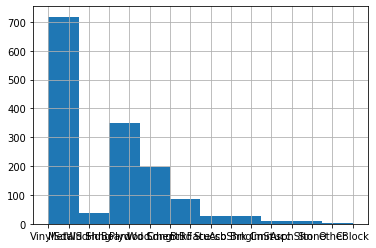

count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object
------------------------------------
------------------------------------
Univariate analysis for MasVnrType Variable.


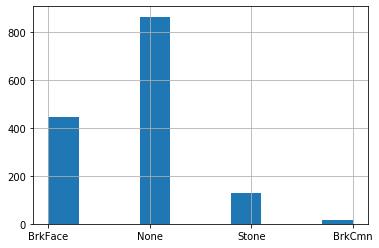

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
------------------------------------
------------------------------------
Univariate analysis for ExterQual Variable.


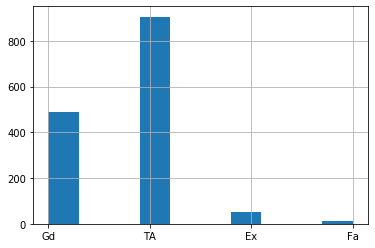

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
------------------------------------
------------------------------------
Univariate analysis for ExterCond Variable.


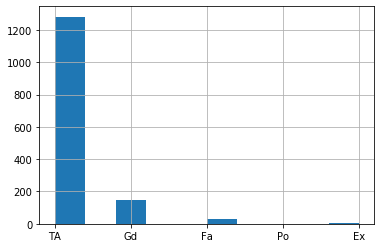

count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Foundation Variable.


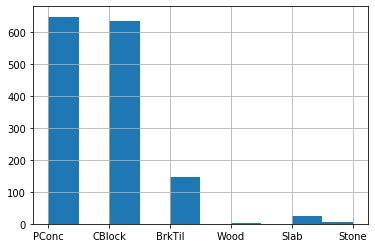

count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
------------------------------------
------------------------------------
Univariate analysis for BsmtQual Variable.


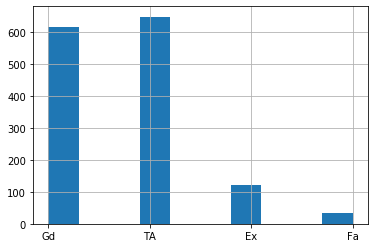

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
------------------------------------
------------------------------------
Univariate analysis for BsmtCond Variable.


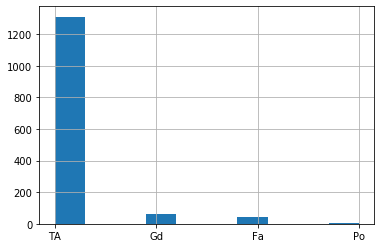

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
------------------------------------
------------------------------------
Univariate analysis for BsmtExposure Variable.


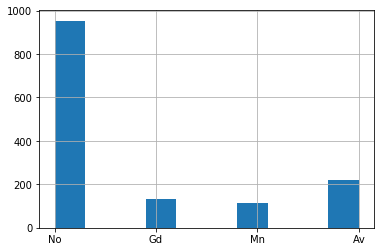

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
------------------------------------
------------------------------------
Univariate analysis for BsmtFinType1 Variable.


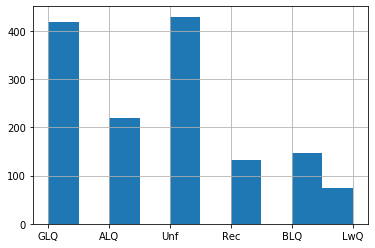

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
------------------------------------
------------------------------------
Univariate analysis for BsmtFinType2 Variable.


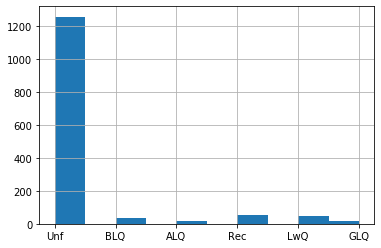

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Heating Variable.


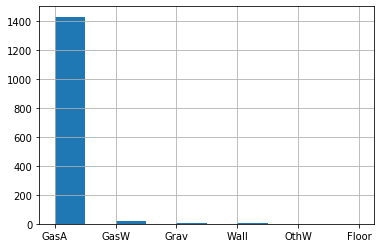

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object
------------------------------------
------------------------------------
Univariate analysis for HeatingQC Variable.


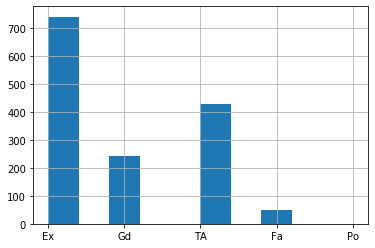

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object
------------------------------------
------------------------------------
Univariate analysis for CentralAir Variable.


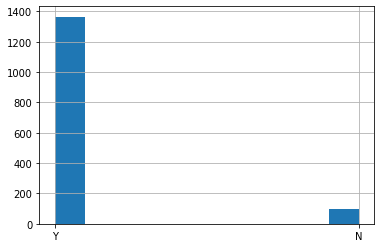

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Electrical Variable.


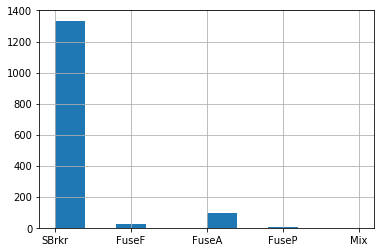

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
------------------------------------
------------------------------------
Univariate analysis for KitchenQual Variable.


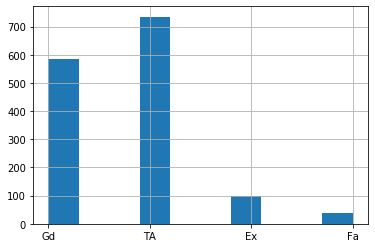

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object
------------------------------------
------------------------------------
Univariate analysis for Functional Variable.


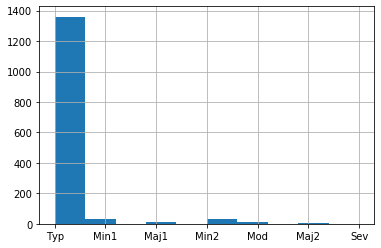

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object
------------------------------------
------------------------------------
Univariate analysis for FireplaceQu Variable.


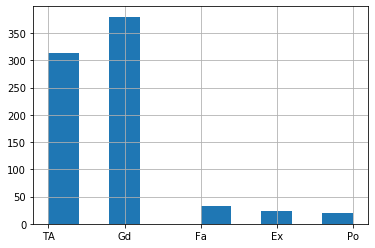

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
------------------------------------
------------------------------------
Univariate analysis for GarageType Variable.


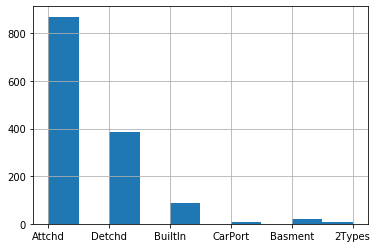

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
------------------------------------
------------------------------------
Univariate analysis for GarageFinish Variable.


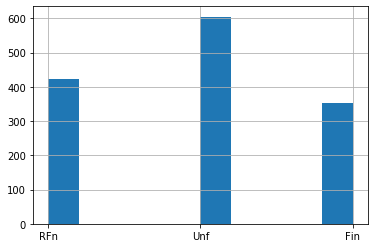

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
------------------------------------
------------------------------------
Univariate analysis for GarageQual Variable.


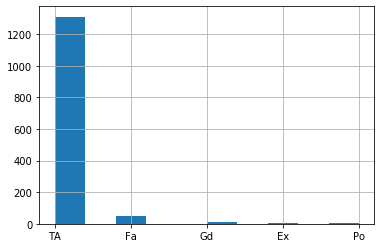

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
------------------------------------
------------------------------------
Univariate analysis for GarageCond Variable.


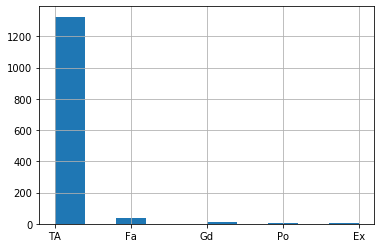

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
------------------------------------
------------------------------------
Univariate analysis for PavedDrive Variable.


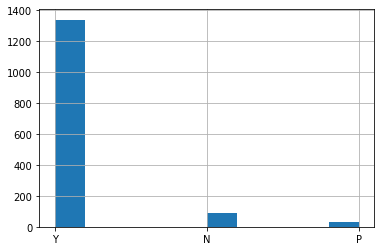

count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object
------------------------------------
------------------------------------
Univariate analysis for MSSubClass_combine Variable.


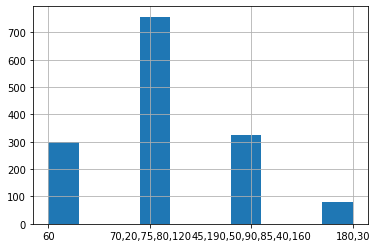

count                1460
unique                  4
top       70,20,75,80,120
freq                  757
Name: MSSubClass_combine, dtype: object


In [15]:
# For all the Categorical data type plotting histogram to show the spread of the variables on individual variables.
for i in Base_Data.columns:
    if Base_Data[i].dtypes not in ['int64',float]:
        print("------------------------------------")
        print("------------------------------------")
        print("Univariate analysis for "+i+" Variable.")
        Base_Data[i].hist()
        plt.show()
        print(Base_Data[i].describe())

# Bivariate Analysis

**************************************************MSZoning**************************************************
MSZoning VS SalePrice


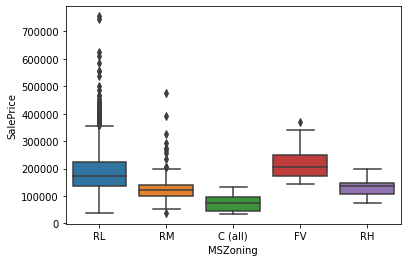

              SalePrice
MSZoning               
C (all)    74528.000000
FV        214014.061538
RH        131558.375000
RL        191004.994787
RM        126316.830275
**************************************************LotFrontage**************************************************
LotFrontage VS SalePrice


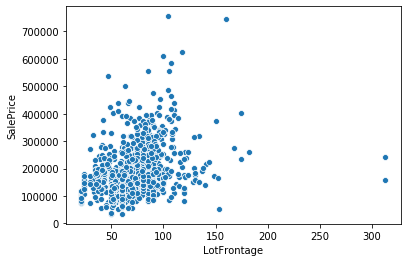

             LotFrontage  SalePrice
LotFrontage     1.000000   0.351799
SalePrice       0.351799   1.000000
**************************************************LotArea**************************************************
LotArea VS SalePrice


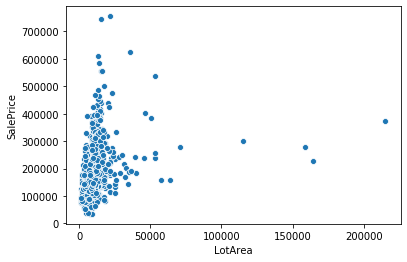

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000
**************************************************Street**************************************************
Street VS SalePrice


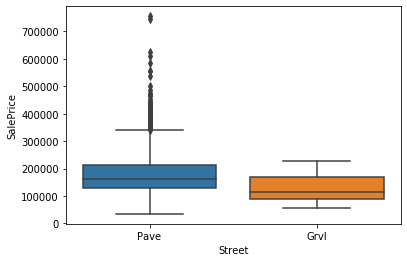

            SalePrice
Street               
Grvl    130190.500000
Pave    181130.538514
**************************************************LotShape**************************************************
LotShape VS SalePrice


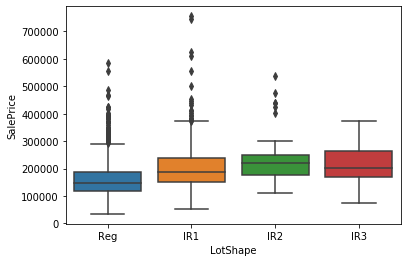

              SalePrice
LotShape               
IR1       206101.665289
IR2       239833.365854
IR3       216036.500000
Reg       164754.818378
**************************************************LandContour**************************************************
LandContour VS SalePrice


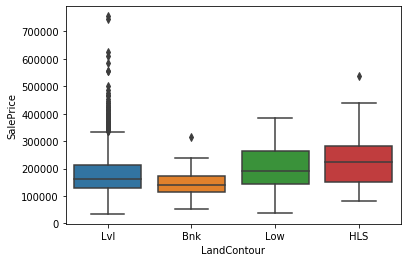

                 SalePrice
LandContour               
Bnk          143104.079365
HLS          231533.940000
Low          203661.111111
Lvl          180183.746758
**************************************************Utilities**************************************************
Utilities VS SalePrice


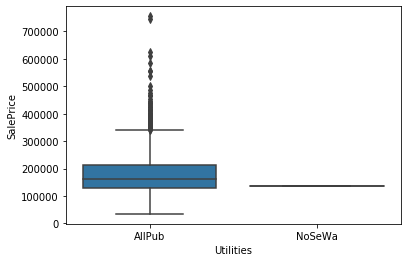

              SalePrice
Utilities              
AllPub     180950.95682
NoSeWa     137500.00000
**************************************************LotConfig**************************************************
LotConfig VS SalePrice


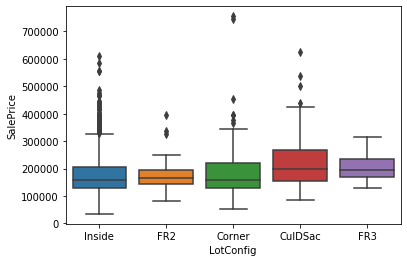

               SalePrice
LotConfig               
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
**************************************************LandSlope**************************************************
LandSlope VS SalePrice


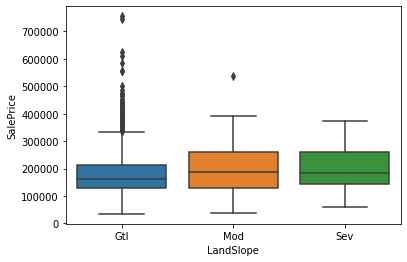

               SalePrice
LandSlope               
Gtl        179956.799566
Mod        196734.138462
Sev        204379.230769
**************************************************Neighborhood**************************************************
Neighborhood VS SalePrice


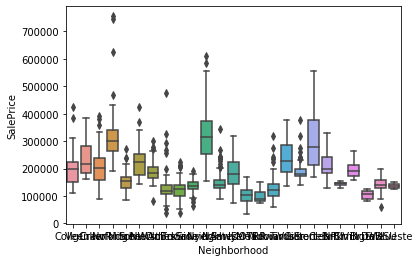

                  SalePrice
Neighborhood               
Blmngtn       194870.882353
Blueste       137500.000000
BrDale        104493.750000
BrkSide       124834.051724
ClearCr       212565.428571
CollgCr       197965.773333
Crawfor       210624.725490
Edwards       128219.700000
Gilbert       192854.506329
IDOTRR        100123.783784
MeadowV        98576.470588
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
NWAmes        189050.068493
NoRidge       335295.317073
NridgHt       316270.623377
OldTown       128225.300885
SWISU         142591.360000
Sawyer        136793.135135
SawyerW       186555.796610
Somerst       225379.837209
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
**************************************************Condition1**************************************************
Condition1 VS SalePrice


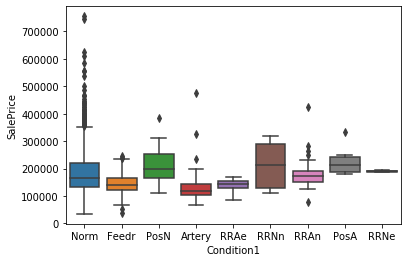

                SalePrice
Condition1               
Artery      135091.666667
Feedr       142475.481481
Norm        184495.492063
PosA        225875.000000
PosN        215184.210526
RRAe        138400.000000
RRAn        184396.615385
RRNe        190750.000000
RRNn        212400.000000
**************************************************Condition2**************************************************
Condition2 VS SalePrice


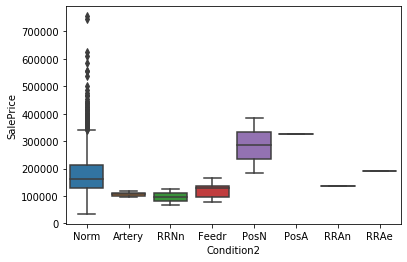

                SalePrice
Condition2               
Artery      106500.000000
Feedr       121166.666667
Norm        181169.405536
PosA        325000.000000
PosN        284875.000000
RRAe        190000.000000
RRAn        136905.000000
RRNn         96750.000000
**************************************************BldgType**************************************************
BldgType VS SalePrice


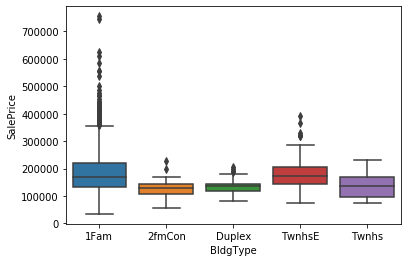

              SalePrice
BldgType               
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
**************************************************HouseStyle**************************************************
HouseStyle VS SalePrice


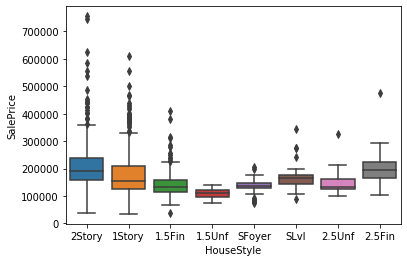

                SalePrice
HouseStyle               
1.5Fin      143116.740260
1.5Unf      110150.000000
1Story      175985.477961
2.5Fin      220000.000000
2.5Unf      157354.545455
2Story      210051.764045
SFoyer      135074.486486
SLvl        166703.384615
**************************************************OverallQual**************************************************
OverallQual VS SalePrice


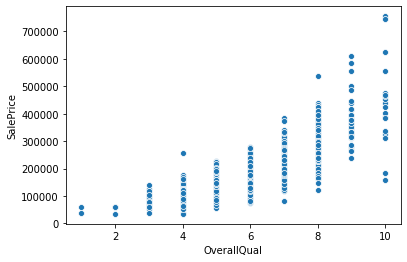

             OverallQual  SalePrice
OverallQual     1.000000   0.790982
SalePrice       0.790982   1.000000
**************************************************OverallCond**************************************************
OverallCond VS SalePrice


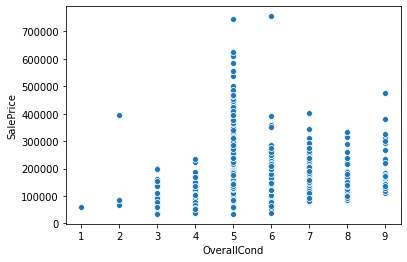

             OverallCond  SalePrice
OverallCond     1.000000  -0.077856
SalePrice      -0.077856   1.000000
**************************************************RoofStyle**************************************************
RoofStyle VS SalePrice


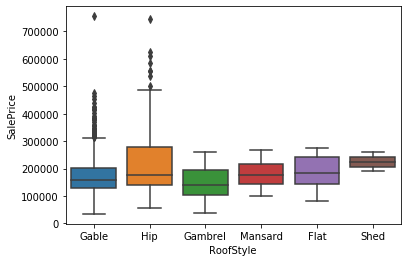

               SalePrice
RoofStyle               
Flat       194690.000000
Gable      171483.956179
Gambrel    148909.090909
Hip        218876.933566
Mansard    180568.428571
Shed       225000.000000
**************************************************RoofMatl**************************************************
RoofMatl VS SalePrice


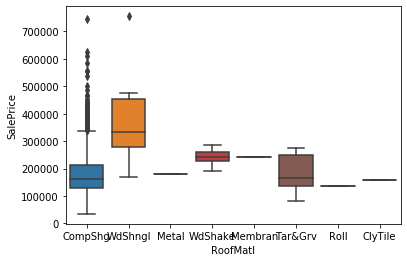

              SalePrice
RoofMatl               
ClyTile   160000.000000
CompShg   179803.679219
Membran   241500.000000
Metal     180000.000000
Roll      137000.000000
Tar&Grv   185406.363636
WdShake   241400.000000
WdShngl   390250.000000
**************************************************Exterior1st**************************************************
Exterior1st VS SalePrice


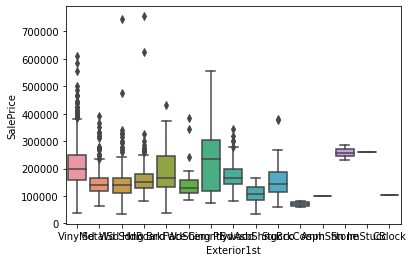

                 SalePrice
Exterior1st               
AsbShng      107385.550000
AsphShn      100000.000000
BrkComm       71000.000000
BrkFace      194573.000000
CBlock       105000.000000
CemntBd      231690.655738
HdBoard      163077.450450
ImStucc      262000.000000
MetalSd      149422.177273
Plywood      175942.379630
Stone        258500.000000
Stucco       162990.000000
VinylSd      213732.900971
Wd Sdng      149841.645631
WdShing      150655.076923
**************************************************Exterior2nd**************************************************
Exterior2nd VS SalePrice


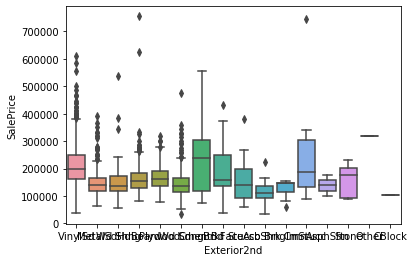

                 SalePrice
Exterior2nd               
AsbShng      114060.550000
AsphShn      138000.000000
Brk Cmn      126714.285714
BrkFace      195818.000000
CBlock       105000.000000
CmentBd      230093.833333
HdBoard      167661.565217
ImStucc      252070.000000
MetalSd      149803.172897
Other        319000.000000
Plywood      168112.387324
Stone        158224.800000
Stucco       155905.153846
VinylSd      214432.460317
Wd Sdng      148386.065990
Wd Shng      161328.947368
**************************************************MasVnrType**************************************************
MasVnrType VS SalePrice


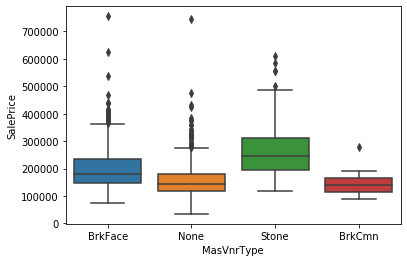

                SalePrice
MasVnrType               
BrkCmn      146318.066667
BrkFace     204691.871910
None        156221.891204
Stone       265583.625000
**************************************************MasVnrArea**************************************************
MasVnrArea VS SalePrice


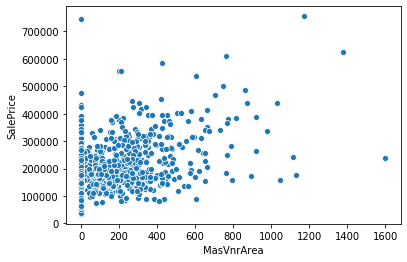

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.477493
SalePrice     0.477493   1.000000
**************************************************ExterQual**************************************************
ExterQual VS SalePrice


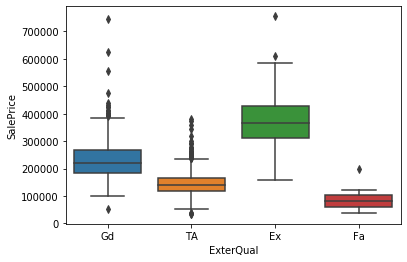

               SalePrice
ExterQual               
Ex         367360.961538
Fa          87985.214286
Gd         231633.510246
TA         144341.313466
**************************************************ExterCond**************************************************
ExterCond VS SalePrice


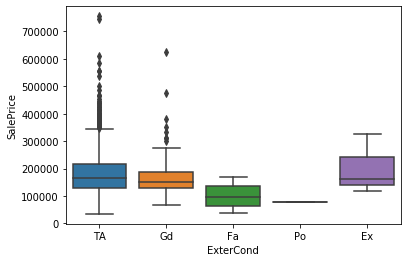

               SalePrice
ExterCond               
Ex         201333.333333
Fa         102595.142857
Gd         168897.568493
Po          76500.000000
TA         184034.896256
**************************************************Foundation**************************************************
Foundation VS SalePrice


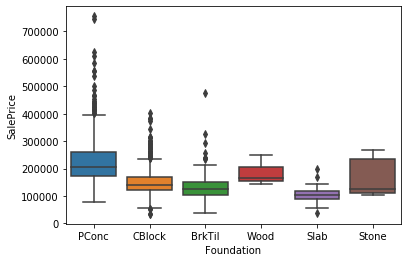

                SalePrice
Foundation               
BrkTil      132291.075342
CBlock      149805.714511
PConc       225230.442040
Slab        107365.625000
Stone       165959.166667
Wood        185666.666667
**************************************************BsmtQual**************************************************
BsmtQual VS SalePrice


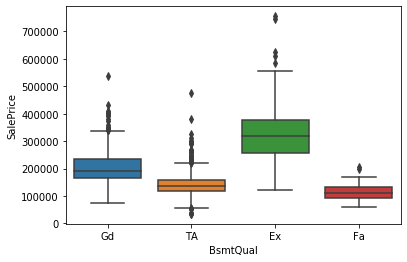

              SalePrice
BsmtQual               
Ex        327041.041322
Fa        115692.028571
Gd        202688.478964
TA        140759.818182
**************************************************BsmtCond**************************************************
BsmtCond VS SalePrice


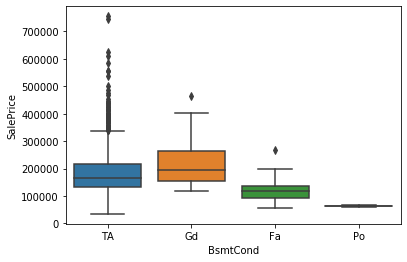

              SalePrice
BsmtCond               
Fa        121809.533333
Gd        213599.907692
Po         64000.000000
TA        183632.620900
**************************************************BsmtExposure**************************************************
BsmtExposure VS SalePrice


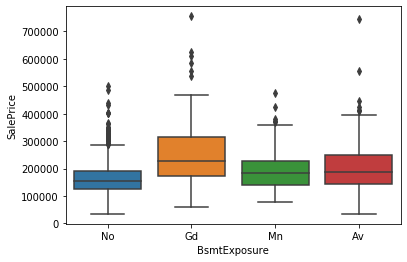

                  SalePrice
BsmtExposure               
Av            206643.420814
Gd            257689.805970
Mn            192789.657895
No            165652.295908
**************************************************BsmtFinType1**************************************************
BsmtFinType1 VS SalePrice


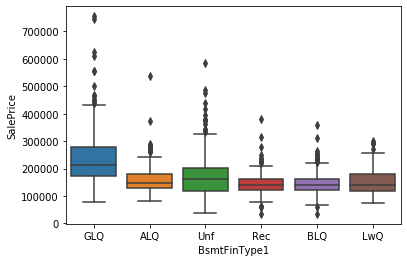

                  SalePrice
BsmtFinType1               
ALQ           161573.068182
BLQ           149493.655405
GLQ           235413.720096
LwQ           151852.702703
Rec           146889.248120
Unf           170670.576744
**************************************************BsmtFinSF1**************************************************
BsmtFinSF1 VS SalePrice


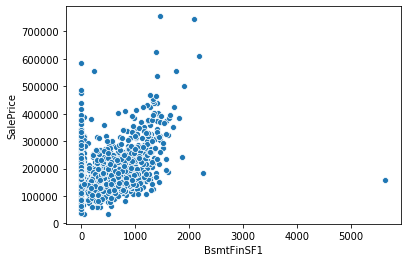

            BsmtFinSF1  SalePrice
BsmtFinSF1     1.00000    0.38642
SalePrice      0.38642    1.00000
**************************************************BsmtFinType2**************************************************
BsmtFinType2 VS SalePrice


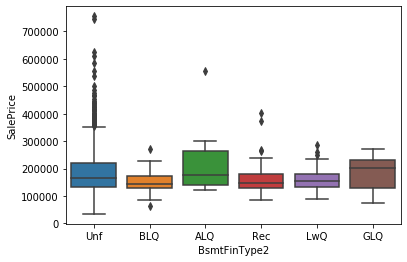

                  SalePrice
BsmtFinType2               
ALQ           209942.105263
BLQ           151101.000000
GLQ           180982.142857
LwQ           164364.130435
Rec           164917.129630
Unf           184694.690287
**************************************************BsmtFinSF2**************************************************
BsmtFinSF2 VS SalePrice


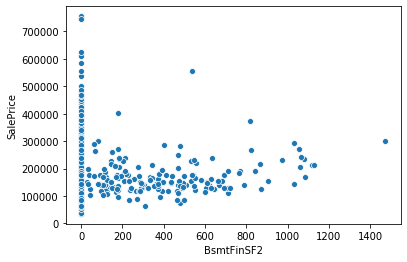

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.011378
SalePrice    -0.011378   1.000000
**************************************************BsmtUnfSF**************************************************
BsmtUnfSF VS SalePrice


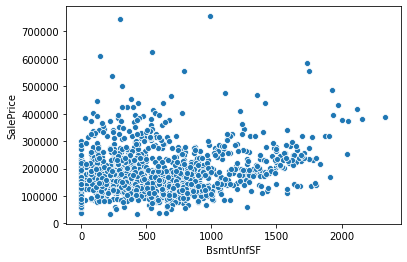

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.214479
SalePrice   0.214479   1.000000
**************************************************TotalBsmtSF**************************************************
TotalBsmtSF VS SalePrice


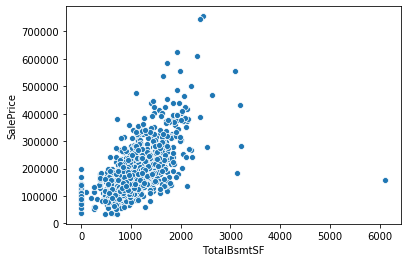

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.613581
SalePrice       0.613581   1.000000
**************************************************Heating**************************************************
Heating VS SalePrice


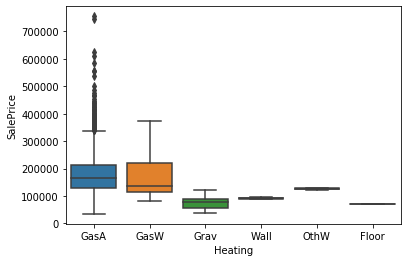

             SalePrice
Heating               
Floor     72500.000000
GasA     182021.195378
GasW     166632.166667
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000
**************************************************HeatingQC**************************************************
HeatingQC VS SalePrice


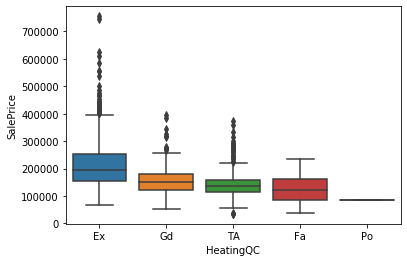

               SalePrice
HeatingQC               
Ex         214914.429150
Fa         123919.489796
Gd         156858.871369
Po          87000.000000
TA         142362.876168
**************************************************CentralAir**************************************************
CentralAir VS SalePrice


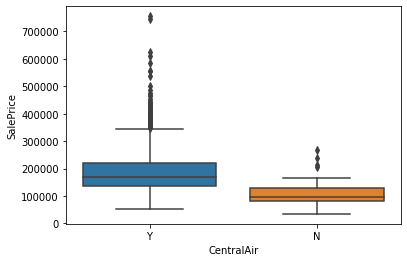

                SalePrice
CentralAir               
N           105264.073684
Y           186186.709890
**************************************************Electrical**************************************************
Electrical VS SalePrice


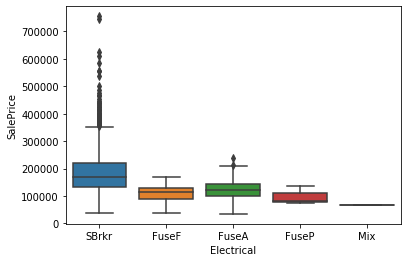

                SalePrice
Electrical               
FuseA       122196.893617
FuseF       107675.444444
FuseP        97333.333333
Mix          67000.000000
SBrkr       186825.113193
**************************************************1stFlrSF**************************************************
1stFlrSF VS SalePrice


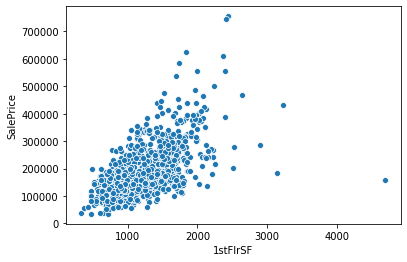

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.605852
SalePrice  0.605852   1.000000
**************************************************2ndFlrSF**************************************************
2ndFlrSF VS SalePrice


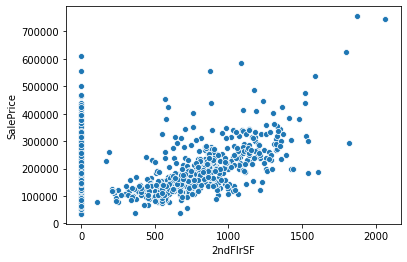

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.319334
SalePrice  0.319334   1.000000
**************************************************LowQualFinSF**************************************************
LowQualFinSF VS SalePrice


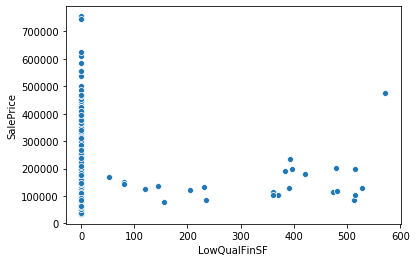

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.025606
SalePrice        -0.025606   1.000000
**************************************************GrLivArea**************************************************
GrLivArea VS SalePrice


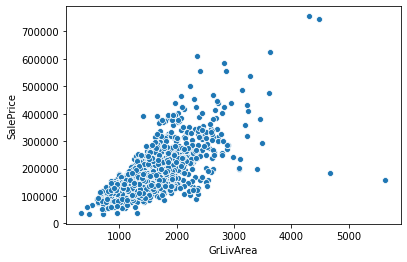

           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePrice   0.708624   1.000000
**************************************************BsmtFullBath**************************************************
BsmtFullBath VS SalePrice


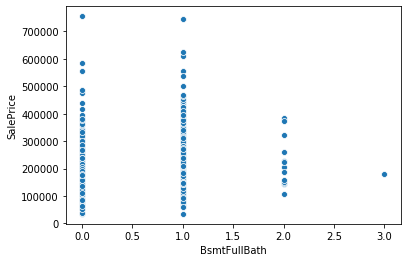

              BsmtFullBath  SalePrice
BsmtFullBath      1.000000   0.227122
SalePrice         0.227122   1.000000
**************************************************BsmtHalfBath**************************************************
BsmtHalfBath VS SalePrice


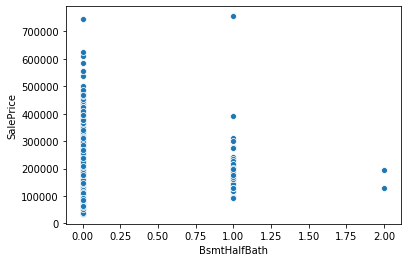

              BsmtHalfBath  SalePrice
BsmtHalfBath      1.000000  -0.016844
SalePrice        -0.016844   1.000000
**************************************************FullBath**************************************************
FullBath VS SalePrice


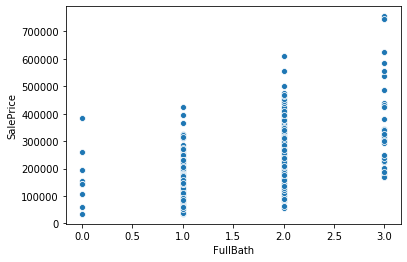

           FullBath  SalePrice
FullBath   1.000000   0.560664
SalePrice  0.560664   1.000000
**************************************************HalfBath**************************************************
HalfBath VS SalePrice


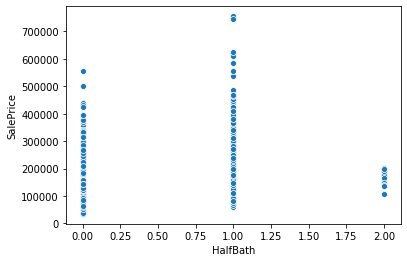

           HalfBath  SalePrice
HalfBath   1.000000   0.284108
SalePrice  0.284108   1.000000
**************************************************BedroomAbvGr**************************************************
BedroomAbvGr VS SalePrice


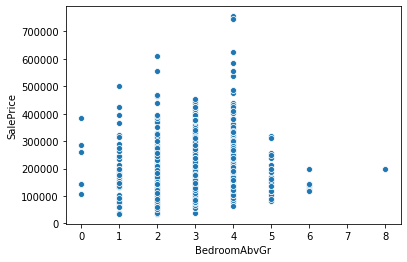

              BedroomAbvGr  SalePrice
BedroomAbvGr      1.000000   0.168213
SalePrice         0.168213   1.000000
**************************************************KitchenAbvGr**************************************************
KitchenAbvGr VS SalePrice


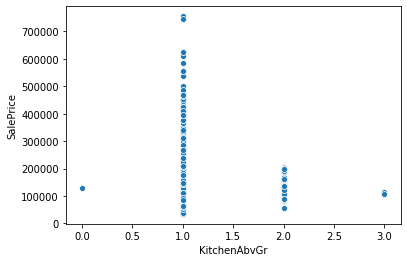

              KitchenAbvGr  SalePrice
KitchenAbvGr      1.000000  -0.135907
SalePrice        -0.135907   1.000000
**************************************************KitchenQual**************************************************
KitchenQual VS SalePrice


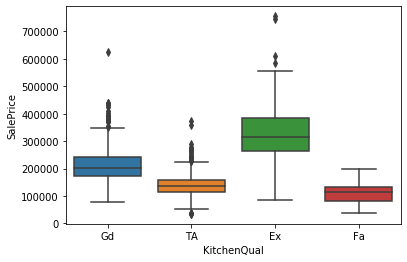

                 SalePrice
KitchenQual               
Ex           328554.670000
Fa           105565.205128
Gd           212116.023891
TA           139962.511565
**************************************************TotRmsAbvGrd**************************************************
TotRmsAbvGrd VS SalePrice


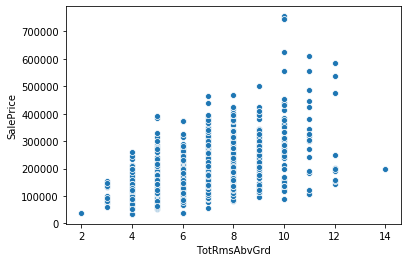

              TotRmsAbvGrd  SalePrice
TotRmsAbvGrd      1.000000   0.533723
SalePrice         0.533723   1.000000
**************************************************Functional**************************************************
Functional VS SalePrice


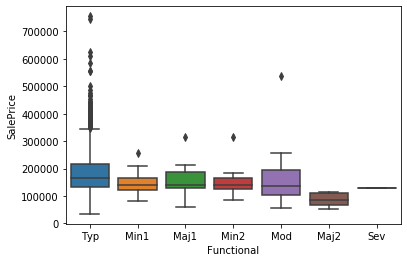

                SalePrice
Functional               
Maj1        153948.142857
Maj2         85800.000000
Min1        146385.483871
Min2        144240.647059
Mod         168393.333333
Sev         129000.000000
Typ         183429.147059
**************************************************Fireplaces**************************************************
Fireplaces VS SalePrice


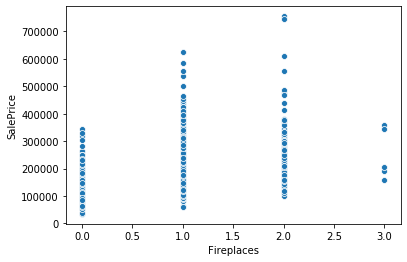

            Fireplaces  SalePrice
Fireplaces    1.000000   0.466929
SalePrice     0.466929   1.000000
**************************************************FireplaceQu**************************************************
FireplaceQu VS SalePrice


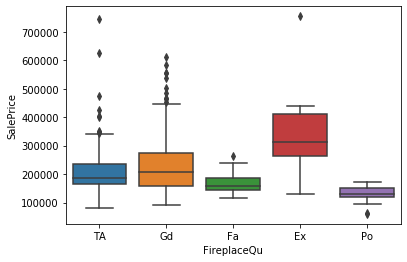

                 SalePrice
FireplaceQu               
Ex           337712.500000
Fa           167298.484848
Gd           226351.415789
Po           129764.150000
TA           205723.488818
**************************************************GarageType**************************************************
GarageType VS SalePrice


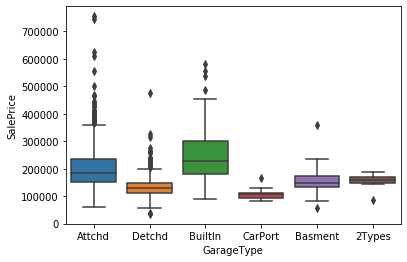

                SalePrice
GarageType               
2Types      151283.333333
Attchd      202892.656322
Basment     160570.684211
BuiltIn     254751.738636
CarPort     109962.111111
Detchd      134091.162791
**************************************************GarageFinish**************************************************
GarageFinish VS SalePrice


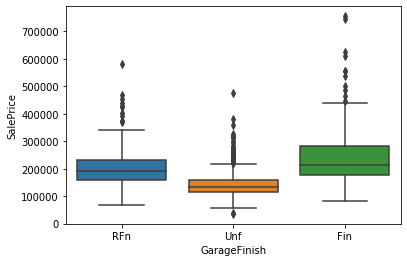

                  SalePrice
GarageFinish               
Fin           240052.690341
RFn           202068.869668
Unf           142156.423140
**************************************************GarageCars**************************************************
GarageCars VS SalePrice


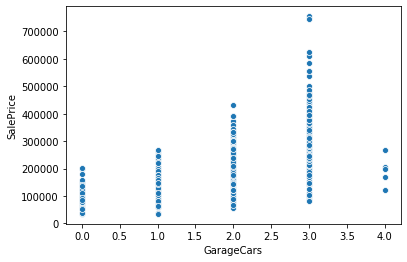

            GarageCars  SalePrice
GarageCars    1.000000   0.640409
SalePrice     0.640409   1.000000
**************************************************GarageArea**************************************************
GarageArea VS SalePrice


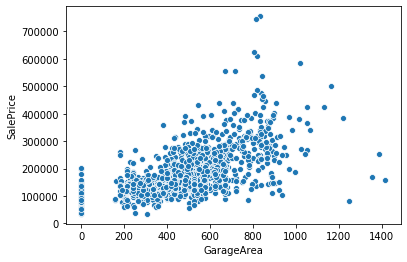

            GarageArea  SalePrice
GarageArea    1.000000   0.623431
SalePrice     0.623431   1.000000
**************************************************GarageQual**************************************************
GarageQual VS SalePrice


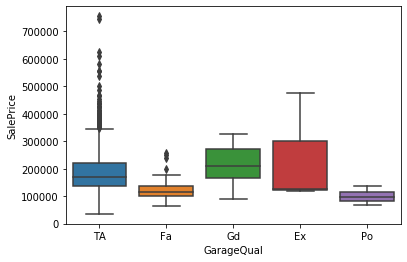

                SalePrice
GarageQual               
Ex          241000.000000
Fa          123573.354167
Gd          215860.714286
Po          100166.666667
TA          187489.836003
**************************************************GarageCond**************************************************
GarageCond VS SalePrice


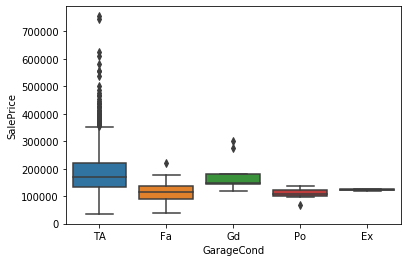

                SalePrice
GarageCond               
Ex          124000.000000
Fa          114654.028571
Gd          179930.000000
Po          108500.000000
TA          187885.735294
**************************************************PavedDrive**************************************************
PavedDrive VS SalePrice


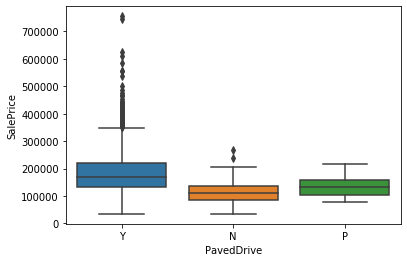

                SalePrice
PavedDrive               
N           115039.122222
P           132330.000000
Y           186433.973881
**************************************************WoodDeckSF**************************************************
WoodDeckSF VS SalePrice


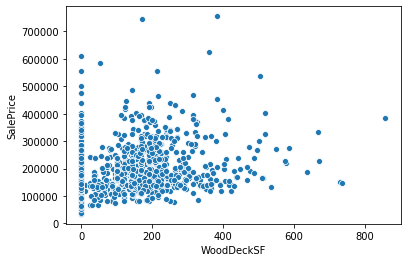

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.324413
SalePrice     0.324413   1.000000
**************************************************OpenPorchSF**************************************************
OpenPorchSF VS SalePrice


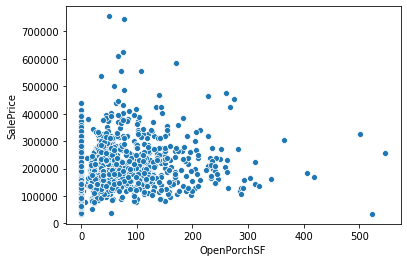

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.315856
SalePrice       0.315856   1.000000
**************************************************EnclosedPorch**************************************************
EnclosedPorch VS SalePrice


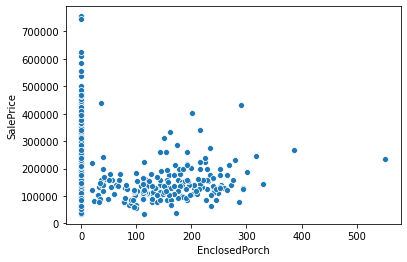

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.128578
SalePrice          -0.128578   1.000000
**************************************************3SsnPorch**************************************************
3SsnPorch VS SalePrice


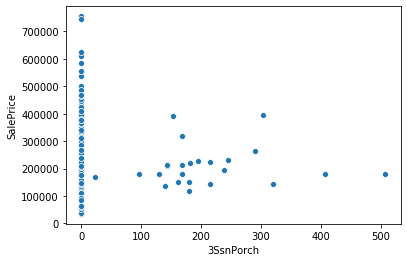

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.044584
SalePrice   0.044584   1.000000
**************************************************ScreenPorch**************************************************
ScreenPorch VS SalePrice


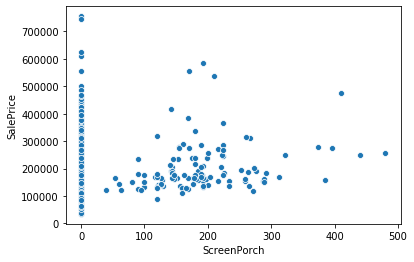

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.111447
SalePrice       0.111447   1.000000
**************************************************PoolArea**************************************************
PoolArea VS SalePrice


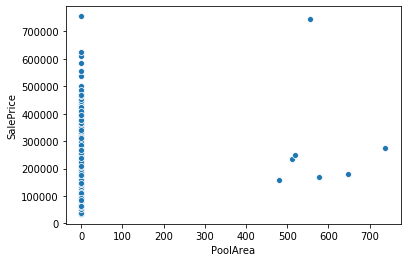

           PoolArea  SalePrice
PoolArea   1.000000   0.092404
SalePrice  0.092404   1.000000
**************************************************MiscVal**************************************************
MiscVal VS SalePrice


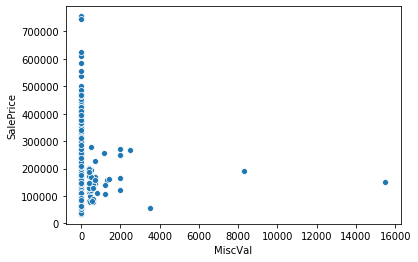

           MiscVal  SalePrice
MiscVal    1.00000   -0.02119
SalePrice -0.02119    1.00000
**************************************************SalePrice**************************************************
**************************************************MSSubClass_combine**************************************************
MSSubClass_combine VS SalePrice


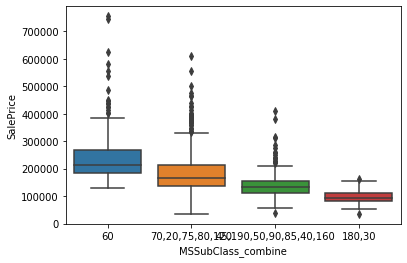

                            SalePrice
MSSubClass_combine                   
180,30                   96648.746835
45,190,50,90,85,40,160  138728.458462
60                      239948.501672
70,20,75,80,120         184515.645971
**************************************************How_Old_Building_Is**************************************************
How_Old_Building_Is VS SalePrice


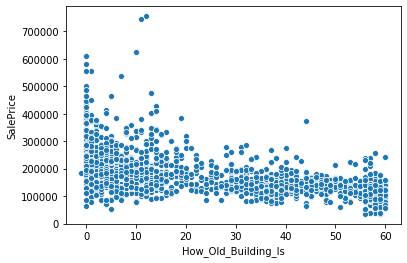

                     How_Old_Building_Is  SalePrice
How_Old_Building_Is             1.000000  -0.509079
SalePrice                      -0.509079   1.000000
**************************************************How_Old_Garage_Is**************************************************
How_Old_Garage_Is VS SalePrice


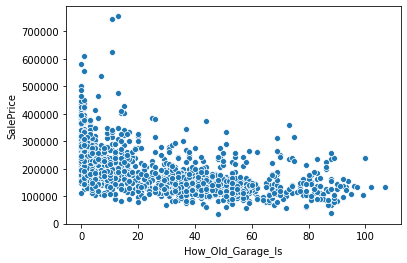

                   How_Old_Garage_Is  SalePrice
How_Old_Garage_Is           1.000000  -0.487069
SalePrice                  -0.487069   1.000000


In [16]:
for i in Base_Data.columns:
    tmp=Base_Data[[i,'SalePrice']]
    tmp=tmp[tmp[i].isnull()==False]
    tmp.reset_index(drop=True,inplace=True)
    print("*"*50+i+"*"*50)
    if Base_Data[i].dtypes not in ['int64',float]:
        print(i + " VS " + "SalePrice")
        sns.boxplot(x=i,y="SalePrice",data=tmp)
        plt.show()
        print(tmp.groupby(i).agg({'SalePrice':'mean'}))
    elif i not in ['SalePrice']:
        print(i + " VS " + "SalePrice")
        sns.scatterplot(x=i,y="SalePrice",data=tmp)
        plt.show()
        print(tmp.corr())

In [17]:
# Dropping variable which have less than 10% correlation
a=pd.DataFrame(Base_Data.corr())['SalePrice'].reset_index(drop=False)
a['SalePrice']=abs(a['SalePrice'])
a=a[a['SalePrice']<0.1]
Base_Data.drop(list(a['index']),axis=1,inplace=True)

In [18]:
a=Base_Data.isnull().sum()[Base_Data.isnull().sum()>0].reset_index(drop=False)
a.columns=["Variable_Name","Number_Of_Missing"]
b=Base_Data[list(Base_Data.isnull().sum()[Base_Data.isnull().sum()>0].index)].dtypes.reset_index(drop=False)
b.columns=["Variable_Name","dtype"]
a=a.merge(b,on="Variable_Name",how="left")
print(a)

# Creating one more category of nan value in all the catogerical variable
# Filling Continuous value with median
for i in range(0,len(a)):
    if a['dtype'][i]=="object":
        Base_Data[a['Variable_Name'][i]].fillna("Missing",inplace=True)
        print(Base_Data[a['Variable_Name'][i]].value_counts(dropna=False))
    else:
        Base_Data[a['Variable_Name'][i]].fillna(Base_Data[a['Variable_Name'][i]].median(),inplace=True)
        print(Base_Data[a['Variable_Name'][i]].isnull().sum())

        Variable_Name  Number_Of_Missing    dtype
0         LotFrontage                259  float64
1          MasVnrType                  8   object
2          MasVnrArea                  8  float64
3            BsmtQual                 37   object
4            BsmtCond                 37   object
5        BsmtExposure                 38   object
6        BsmtFinType1                 37   object
7        BsmtFinType2                 38   object
8          Electrical                  1   object
9         FireplaceQu                690   object
10         GarageType                 81   object
11       GarageFinish                 81   object
12         GarageQual                 81   object
13         GarageCond                 81   object
14  How_Old_Garage_Is                 81  float64
0
None       864
BrkFace    445
Stone      128
BrkCmn      15
Missing      8
Name: MasVnrType, dtype: int64
0
TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQual,

In [19]:
# Creating Dummies for Categorical Variables
Base_Data=pd.get_dummies(Base_Data, columns = list(Base_Data.dtypes[Base_Data.dtypes=="object"].index),drop_first=True)
print(Base_Data)
print(Base_Data.shape)

      LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
0            65.0     8450            7       196.0         706        150   
1            80.0     9600            6         0.0         978        284   
2            68.0    11250            7       162.0         486        434   
3            60.0     9550            7         0.0         216        540   
4            84.0    14260            8       350.0         655        490   
...           ...      ...          ...         ...         ...        ...   
1455         62.0     7917            6         0.0           0        953   
1456         85.0    13175            6       119.0         790        589   
1457         66.0     9042            7         0.0         275        877   
1458         68.0     9717            5         0.0          49          0   
1459         75.0     9937            5         0.0         830        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  GarageCo

In [20]:
Base_Data.dtypes[Base_Data.dtypes!="object"]

LotFrontage                                  float64
LotArea                                        int64
OverallQual                                    int64
MasVnrArea                                   float64
BsmtFinSF1                                     int64
                                              ...   
PavedDrive_P                                   uint8
PavedDrive_Y                                   uint8
MSSubClass_combine_45,190,50,90,85,40,160      uint8
MSSubClass_combine_60                          uint8
MSSubClass_combine_70,20,75,80,120             uint8
Length: 228, dtype: object

In [21]:
df_train,df_test=train_test_split(Base_Data,train_size=0.7,test_size=0.3,random_state=43)

# Checking Distribution of salesprice in test and train
print(df_train['SalePrice'].describe())
print(df_test['SalePrice'].describe())

count      1021.000000
mean     180604.670911
std       78379.878381
min       39300.000000
25%      130000.000000
50%      161000.000000
75%      213490.000000
max      755000.000000
Name: SalePrice, dtype: float64
count       438.000000
mean     181716.305936
std       82031.268528
min       34900.000000
25%      128125.000000
50%      167250.000000
75%      215000.000000
max      625000.000000
Name: SalePrice, dtype: float64


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
clms=list(Base_Data.columns)
clms.remove('SalePrice')

df_train[clms]=scaler.fit_transform(df_train[clms])
df_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,"MSSubClass_combine_45,190,50,90,85,40,160",MSSubClass_combine_60,"MSSubClass_combine_70,20,75,80,120"
760,0.167808,0.046387,0.555556,0.00000,0.108434,0.107877,0.141408,0.121615,0.000000,0.099849,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1011,0.184932,0.050832,0.444444,0.00000,0.000000,0.000000,0.000000,0.305186,0.000000,0.250565,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
200,0.202055,0.042991,0.333333,0.00000,0.000000,0.479880,0.183470,0.180587,0.000000,0.148267,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
424,0.174658,0.045774,0.555556,0.04625,0.109142,0.248288,0.195745,0.197797,0.000000,0.162396,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1385,0.065068,0.023926,0.333333,0.00000,0.130227,0.026113,0.130278,0.106012,0.173366,0.154484,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
clms=list(Base_Data.columns)
clms.remove('SalePrice')

df_test[clms]=scaler.transform(df_test[clms])
df_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,"MSSubClass_combine_45,190,50,90,85,40,160",MSSubClass_combine_60,"MSSubClass_combine_70,20,75,80,120"
860,0.116438,0.037449,0.666667,0.000000,0.000000,0.390411,0.149264,0.132630,0.248910,0.205727,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1146,0.164384,0.059261,0.555556,0.053125,0.222892,0.017123,0.212439,0.221202,0.000000,0.181613,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1092,0.133562,0.042096,0.555556,0.000000,0.074947,0.324486,0.193290,0.242313,0.147215,0.256217,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1018,0.164384,0.056710,0.666667,0.047500,0.000000,0.164384,0.062848,0.107389,0.324455,0.214393,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
628,0.167808,0.061749,0.444444,0.120000,0.115167,0.166952,0.170213,0.162001,0.503632,0.328937,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [25]:
# Checking VIF
clms=list(Base_Data.columns)
clms.remove('SalePrice')

from statsmodels.stats.outliers_influence import variance_inflation_factor
tmp=True

while(tmp==True):
    vif=pd.DataFrame()
    x=df_train[clms]
    vif['Feature']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    print("*"*100)
    print(vif.sort_values('VIF',ascending=False))
    print(clms)
    if max(vif['VIF'])<=5:
        tmp=False
    else:
        clms.remove(vif.sort_values('VIF',ascending=False)['Feature'].iloc[0])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


****************************************************************************************************
                  Feature  VIF
155      BsmtCond_Missing  inf
219    GarageCond_Missing  inf
214    GarageQual_Missing  inf
209  GarageFinish_Missing  inf
208    GarageType_Missing  inf
..                    ...  ...
108    Exterior1st_CBlock  NaN
122    Exterior2nd_CBlock  NaN
156           BsmtCond_Po  NaN
186    Electrical_Missing  NaN
187        Electrical_Mix  NaN

[227 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandConto

****************************************************************************************************
                  Feature  VIF
152      BsmtQual_Missing  inf
213    GarageQual_Missing  inf
207    GarageType_Missing  inf
208  GarageFinish_Missing  inf
164  BsmtFinType1_Missing  inf
..                    ...  ...
108    Exterior1st_CBlock  NaN
122    Exterior2nd_CBlock  NaN
155           BsmtCond_Po  NaN
185    Electrical_Missing  NaN
186        Electrical_Mix  NaN

[225 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandConto

****************************************************************************************************
                  Feature      VIF
206  GarageFinish_Missing      inf
211    GarageQual_Missing      inf
172          Heating_GasA  9511.73
217         GarageCond_TA   267.84
131   Exterior2nd_VinylSd   267.78
..                    ...      ...
108    Exterior1st_CBlock      NaN
122    Exterior2nd_CBlock      NaN
154           BsmtCond_Po      NaN
184    Electrical_Missing      NaN
185        Electrical_Mix      NaN

[223 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


****************************************************************************************************
                Feature      VIF
215       GarageCond_TA  2777.72
211       GarageQual_TA  1901.23
98     RoofMatl_CompShg  1866.08
9             GrLivArea  1401.90
76      Condition2_Norm   858.37
..                  ...      ...
108  Exterior1st_CBlock      NaN
122  Exterior2nd_CBlock      NaN
154         BsmtCond_Po      NaN
183  Electrical_Missing      NaN
184      Electrical_Mix      NaN

[221 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'L

****************************************************************************************************
                Feature      VIF
9             GrLivArea  1367.34
76      Condition2_Norm   798.27
7              1stFlrSF   722.63
210       GarageQual_TA   570.62
93      RoofStyle_Gable   491.13
..                  ...      ...
107  Exterior1st_CBlock      NaN
121  Exterior2nd_CBlock      NaN
153         BsmtCond_Po      NaN
182  Electrical_Missing      NaN
183      Electrical_Mix      NaN

[219 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'L

****************************************************************************************************
                 Feature     VIF
208        GarageQual_TA  544.33
28           Street_Pave  483.54
91       RoofStyle_Gable  474.48
141         ExterCond_TA  466.39
128  Exterior2nd_VinylSd  407.31
..                   ...     ...
105   Exterior1st_CBlock     NaN
119   Exterior2nd_CBlock     NaN
151          BsmtCond_Po     NaN
180   Electrical_Missing     NaN
181       Electrical_Mix     NaN

[217 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',

****************************************************************************************************
                 Feature     VIF
90       RoofStyle_Gable  452.56
140         ExterCond_TA  448.07
127  Exterior2nd_VinylSd  402.42
112  Exterior1st_VinylSd  400.47
6            TotalBsmtSF  274.18
..                   ...     ...
104   Exterior1st_CBlock     NaN
118   Exterior2nd_CBlock     NaN
150          BsmtCond_Po     NaN
179   Electrical_Missing     NaN
180       Electrical_Mix     NaN

[215 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_H

****************************************************************************************************
                 Feature     VIF
126  Exterior2nd_VinylSd  402.09
111  Exterior1st_VinylSd  399.96
6            TotalBsmtSF  271.75
26           MSZoning_RL  214.32
194    GarageType_Attchd  204.41
..                   ...     ...
103   Exterior1st_CBlock     NaN
117   Exterior2nd_CBlock     NaN
148          BsmtCond_Po     NaN
177   Electrical_Missing     NaN
178       Electrical_Mix     NaN

[213 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_H

****************************************************************************************************
                Feature     VIF
25          MSZoning_RL  213.79
192   GarageType_Attchd  199.54
186      Functional_Typ  133.63
12         KitchenAbvGr  121.13
196   GarageType_Detchd   89.38
..                  ...     ...
102  Exterior1st_CBlock     NaN
116  Exterior2nd_CBlock     NaN
146         BsmtCond_Po     NaN
175  Electrical_Missing     NaN
176      Electrical_Mix     NaN

[211 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'La

****************************************************************************************************
                 Feature     VIF
185       Functional_Typ  124.16
12          KitchenAbvGr  120.17
162     BsmtFinType2_Unf   85.38
2            OverallQual   79.76
105  Exterior1st_MetalSd   78.90
..                   ...     ...
101   Exterior1st_CBlock     NaN
115   Exterior2nd_CBlock     NaN
145          BsmtCond_Po     NaN
174   Electrical_Missing     NaN
175       Electrical_Mix     NaN

[209 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandC

****************************************************************************************************
                  Feature    VIF
161      BsmtFinType2_Unf  84.36
104   Exterior1st_MetalSd  78.62
2             OverallQual  78.33
153  BsmtFinType1_Missing  72.73
6                1stFlrSF  62.62
..                    ...    ...
100    Exterior1st_CBlock    NaN
114    Exterior2nd_CBlock    NaN
144           BsmtCond_Po    NaN
173    Electrical_Missing    NaN
174        Electrical_Mix    NaN

[207 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Ut

****************************************************************************************************
                  Feature    VIF
2             OverallQual  77.45
152  BsmtFinType1_Missing  72.05
6                1stFlrSF  61.02
14             GarageCars  56.18
12           TotRmsAbvGrd  54.04
..                    ...    ...
100    Exterior1st_CBlock    NaN
113    Exterior2nd_CBlock    NaN
143           BsmtCond_Po    NaN
171    Electrical_Missing    NaN
172        Electrical_Mix    NaN

[205 rows x 2 columns]
['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Ut

****************************************************************************************************
                Feature    VIF
5              1stFlrSF  58.83
13           GarageCars  55.97
11         TotRmsAbvGrd  54.01
14           GarageArea  53.10
125     MasVnrType_None  51.67
..                  ...    ...
99   Exterior1st_CBlock    NaN
112  Exterior2nd_CBlock    NaN
142         BsmtCond_Po    NaN
169  Electrical_Missing    NaN
170      Electrical_Mix    NaN

[203 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', '

****************************************************************************************************
                 Feature    VIF
123      MasVnrType_None  51.67
9           BedroomAbvGr  50.64
127         ExterQual_TA  48.63
141          BsmtCond_TA  48.00
180  FireplaceQu_Missing  46.70
..                   ...    ...
97    Exterior1st_CBlock    NaN
110   Exterior2nd_CBlock    NaN
140          BsmtCond_Po    NaN
167   Electrical_Missing    NaN
168       Electrical_Mix    NaN

[201 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2'

****************************************************************************************************
                 Feature    VIF
125         ExterQual_TA  48.32
139          BsmtCond_TA  47.92
178  FireplaceQu_Missing  45.92
162         CentralAir_Y  43.37
77     HouseStyle_1Story  42.13
..                   ...    ...
96    Exterior1st_CBlock    NaN
109   Exterior2nd_CBlock    NaN
138          BsmtCond_Po    NaN
165   Electrical_Missing    NaN
166       Electrical_Mix    NaN

[199 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3

****************************************************************************************************
                 Feature    VIF
176  FireplaceQu_Missing  45.63
77     HouseStyle_1Story  41.80
160         CentralAir_Y  41.55
59       Condition1_Norm  38.03
9           TotRmsAbvGrd  36.31
..                   ...    ...
96    Exterior1st_CBlock    NaN
109   Exterior2nd_CBlock    NaN
137          BsmtCond_Po    NaN
163   Electrical_Missing    NaN
164       Electrical_Mix    NaN

[197 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3

****************************************************************************************************
                Feature    VIF
77    HouseStyle_1Story  40.89
59      Condition1_Norm  37.78
9          TotRmsAbvGrd  35.76
7              FullBath  34.48
26      LandContour_Lvl  31.00
..                  ...    ...
96   Exterior1st_CBlock    NaN
109  Exterior2nd_CBlock    NaN
137         BsmtCond_Po    NaN
162  Electrical_Missing    NaN
163      Electrical_Mix    NaN

[195 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfi

****************************************************************************************************
                 Feature    VIF
9           TotRmsAbvGrd  35.66
7               FullBath  33.34
26       LandContour_Lvl  30.83
189         PavedDrive_Y  29.35
101  Exterior1st_VinylSd  28.64
..                   ...    ...
94    Exterior1st_CBlock    NaN
107   Exterior2nd_CBlock    NaN
135          BsmtCond_Po    NaN
160   Electrical_Missing    NaN
161       Electrical_Mix    NaN

[193 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3

****************************************************************************************************
                 Feature    VIF
24       LandContour_Lvl  30.70
187         PavedDrive_Y  29.27
99   Exterior1st_VinylSd  27.90
9             GarageArea  25.66
94   Exterior1st_HdBoard  24.00
..                   ...    ...
92    Exterior1st_CBlock    NaN
105   Exterior2nd_CBlock    NaN
133          BsmtCond_Po    NaN
158   Electrical_Missing    NaN
159       Electrical_Mix    NaN

[191 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Land

****************************************************************************************************
                 Feature    VIF
98   Exterior1st_VinylSd  26.94
9             GarageArea  25.33
93   Exterior1st_HdBoard  23.99
99   Exterior1st_Wd Sdng  22.26
92   Exterior1st_CemntBd  22.23
..                   ...    ...
91    Exterior1st_CBlock    NaN
104   Exterior2nd_CBlock    NaN
132          BsmtCond_Po    NaN
157   Electrical_Missing    NaN
158       Electrical_Mix    NaN

[189 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSl

****************************************************************************************************
                                Feature    VIF
157                    Electrical_SBrkr  21.52
91                  Exterior1st_CemntBd  21.14
92                  Exterior1st_HdBoard  21.11
103                 Exterior2nd_CmentBd  20.66
186  MSSubClass_combine_70,20,75,80,120  20.40
..                                  ...    ...
90                   Exterior1st_CBlock    NaN
102                  Exterior2nd_CBlock    NaN
130                         BsmtCond_Po    NaN
155                  Electrical_Missing    NaN
156                      Electrical_Mix    NaN

[187 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotSha

****************************************************************************************************
                                Feature    VIF
184  MSSubClass_combine_70,20,75,80,120  20.04
183               MSSubClass_combine_60  19.91
91                  Exterior1st_HdBoard  19.38
158                      KitchenQual_TA  18.99
103                 Exterior2nd_HdBoard  18.84
..                                  ...    ...
90                   Exterior1st_CBlock    NaN
101                  Exterior2nd_CBlock    NaN
129                         BsmtCond_Po    NaN
154                  Electrical_Missing    NaN
155                      Electrical_Mix    NaN

[185 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotSha

****************************************************************************************************
                  Feature    VIF
157        KitchenQual_TA  18.83
126           BsmtQual_TA  17.87
130  BsmtExposure_Missing  17.13
141  BsmtFinType2_Missing  16.28
41     Neighborhood_NAmes  15.83
..                    ...    ...
90     Exterior1st_CBlock    NaN
100    Exterior2nd_CBlock    NaN
128           BsmtCond_Po    NaN
153    Electrical_Missing    NaN
154        Electrical_Mix    NaN

[183 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlop

****************************************************************************************************
                  Feature    VIF
129  BsmtExposure_Missing  16.88
140  BsmtFinType2_Missing  16.17
5                2ndFlrSF  14.99
0             LotFrontage  13.75
8              Fireplaces  13.05
..                    ...    ...
90     Exterior1st_CBlock    NaN
100    Exterior2nd_CBlock    NaN
127           BsmtCond_Po    NaN
152    Electrical_Missing    NaN
153        Electrical_Mix    NaN

[181 rows x 2 columns]
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlop

****************************************************************************************************
                 Feature    VIF
6             Fireplaces  12.87
39    Neighborhood_NAmes  12.13
118     Foundation_PConc  12.09
12     How_Old_Garage_Is  11.17
107  Exterior2nd_Wd Sdng  10.96
..                   ...    ...
88    Exterior1st_CBlock    NaN
98    Exterior2nd_CBlock    NaN
125          BsmtCond_Po    NaN
149   Electrical_Missing    NaN
150       Electrical_Mix    NaN

[178 rows x 2 columns]
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'How_Old_Garage_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighb

****************************************************************************************************
                  Feature    VIF
105   Exterior2nd_Wd Sdng  10.84
37     Neighborhood_NAmes  10.60
91    Exterior1st_Wd Sdng  10.07
3               BsmtUnfSF   9.22
42   Neighborhood_OldTown   9.11
..                    ...    ...
86     Exterior1st_CBlock    NaN
96     Exterior2nd_CBlock    NaN
122           BsmtCond_Po    NaN
146    Electrical_Missing    NaN
147        Electrical_Mix    NaN

[175 rows x 2 columns]
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighb

****************************************************************************************************
                   Feature   VIF
68       HouseStyle_2Story  7.63
171  MSSubClass_combine_60  7.59
122        BsmtExposure_No  7.18
2               BsmtFinSF1  6.84
161       GarageFinish_Unf  6.19
..                     ...   ...
84      Exterior1st_CBlock   NaN
94      Exterior2nd_CBlock   NaN
119            BsmtCond_Po   NaN
143     Electrical_Missing   NaN
144         Electrical_Mix   NaN

[172 rows x 2 columns]
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSid

****************************************************************************************************
                  Feature   VIF
158      GarageFinish_Unf  6.08
8     How_Old_Building_Is  5.87
43   Neighborhood_Somerst  5.85
0                 LotArea  5.75
21       LotConfig_Inside  5.56
..                    ...   ...
82     Exterior1st_CBlock   NaN
92     Exterior2nd_CBlock   NaN
117           BsmtCond_Po   NaN
140    Electrical_Missing   NaN
141        Electrical_Mix   NaN

[169 rows x 2 columns]
['LotArea', 'MasVnrArea', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr'

****************************************************************************************************
                  Feature   VIF
7     How_Old_Building_Is  5.67
20       LotConfig_Inside  5.51
126  BsmtFinType2_Missing  5.43
108     Foundation_CBlock  5.34
109       Foundation_Slab  5.30
..                    ...   ...
80     Exterior1st_CBlock   NaN
90     Exterior2nd_CBlock   NaN
115           BsmtCond_Po   NaN
138    Electrical_Missing   NaN
139        Electrical_Mix   NaN

[166 rows x 2 columns]
['MasVnrArea', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'How_Old_Building_Is', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighbor

****************************************************************************************************
                 Feature   VIF
106    Foundation_CBlock  4.96
9            MSZoning_RM  4.73
80   Exterior1st_Plywood  4.61
94   Exterior2nd_Plywood  4.55
111          BsmtQual_Gd  4.46
..                   ...   ...
78    Exterior1st_CBlock   NaN
88    Exterior2nd_CBlock   NaN
113          BsmtCond_Po   NaN
135   Electrical_Missing   NaN
136       Electrical_Mix   NaN

[163 rows x 2 columns]
['MasVnrArea', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Ed

In [26]:
# remaining column after VIF

clms=['MasVnrArea', 'BsmtFullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_Missing', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Missing', 'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Missing', 'GarageQual_Po', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'PavedDrive_P', 'MSSubClass_combine_45,190,50,90,85,40,160', 'MSSubClass_combine_60']

In [27]:
# Linear regression model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x_train=sm.add_constant(df_train[clms])
lm=sm.OLS(df_train[["SalePrice"]],x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     21.31
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.01e-210
Time:                        19:01:42   Log-Likelihood:                -12158.
No. Observations:                1021   AIC:                         2.462e+04
Df Residuals:                     867   BIC:                         2.538e+04
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
tmp_lm=pd.DataFrame(lm.pvalues).reset_index(drop=False)
tmp_lm=tmp_lm.iloc[1:]
tmp_lm.columns=["Variable_Name","P_Value"]
tmp_lm=tmp_lm[tmp_lm["P_Value"]<=0.05]
tmp_lm.reset_index(drop=True,inplace=True)

x_train=sm.add_constant(df_train[list(tmp_lm['Variable_Name'])])
lm=sm.OLS(df_train[["SalePrice"]],x_train).fit()
print(lm.summary())

x_test=sm.add_constant(df_test[list(tmp_lm['Variable_Name'])])
print(r2_score(df_train[['SalePrice']], lm.predict(x_train)))
print(r2_score(df_test[['SalePrice']], lm.predict(x_test)))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     67.10
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.19e-269
Time:                        19:01:42   Log-Likelihood:                -12217.
No. Observations:                1021   AIC:                         2.453e+04
Df Residuals:                     973   BIC:                         2.477e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.497e+05 

In [29]:
# Selecting all the alpha values

alphas = 10**np.linspace(10,-2,100)*0.5

In [30]:
final_list_of_variables=pd.DataFrame(clms)
final_list_of_variables.columns=["Variable_Name"]
final_list_of_variables["Final_Variable_Name"]=[i.split("_")[0] for i in final_list_of_variables["Variable_Name"]]

In [31]:
# Applying ridge regression cv for finding appropriate alpha

ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', normalize = True)
ridgecv.fit(df_train[clms], df_train[['SalePrice']])
print(ridgecv.alpha_)

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(df_train[clms], df_train[['SalePrice']])
print(mean_squared_error(df_train[['SalePrice']], ridge.predict(df_train[clms])))
print(mean_squared_error(df_test[['SalePrice']], ridge.predict(df_test[clms])))

print(math.sqrt(mean_squared_error(df_train[['SalePrice']], ridge.predict(df_train[clms]))))
print(math.sqrt(mean_squared_error(df_test[['SalePrice']], ridge.predict(df_test[clms]))))

r2_train=r2_score(df_train[['SalePrice']], ridge.predict(df_train[clms]))
print(r2_train)
r2_test=r2_score(df_test[['SalePrice']], ridge.predict(df_test[clms]))
print(r2_test)

print("*"*100)

clms_tmp=copy.deepcopy(clms)
for i in final_list_of_variables["Final_Variable_Name"].unique():
    rm_list=[j for j in clms_tmp if j.split("_")[0]==i]
    for j in rm_list:
        clms_tmp.remove(j)
    # Applying ridge regression cv for finding appropriate alpha

    ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', normalize = True)
    ridgecv.fit(df_train[clms_tmp], df_train[['SalePrice']])
    r2_train_temp=r2_score(df_train[['SalePrice']], ridgecv.predict(df_train[clms_tmp]))
    r2_test_temp=r2_score(df_test[['SalePrice']], ridgecv.predict(df_test[clms_tmp]))
        
    if abs(r2_train_temp-r2_train)<=.001 and abs(r2_test_temp-r2_test)<=.001:
        r2_train=r2_train_temp
        r2_test=r2_test_temp
        print("*"*100)
        print("Variable no use")
        print(r2_score(df_train[['SalePrice']], ridgecv.predict(df_train[clms_tmp])))
        print(r2_score(df_test[['SalePrice']], ridgecv.predict(df_test[clms_tmp])))
        print(i)
    elif (abs(r2_train-r2_test)>abs(r2_test_temp-r2_train_temp)) and (abs(r2_train_temp-r2_train)<=.005 and abs(r2_test_temp-r2_test)<=.005):
        r2_train=r2_train_temp
        r2_test=r2_test_temp
        print("*"*100)
        print("Variable_Unstable")
        print(r2_score(df_train[['SalePrice']], ridgecv.predict(df_train[clms_tmp])))
        print(r2_score(df_test[['SalePrice']], ridgecv.predict(df_test[clms_tmp])))
        print(i)
    else:
        clms_tmp.extend(rm_list)

0.005
1289214012.6017506
1754704393.5041053
35905.62647555047
41889.19184591779
0.7899409403175534
0.7386408060980871
****************************************************************************************************
****************************************************************************************************
Variable_Unstable
0.7861917598067332
0.7416018539045787
OpenPorchSF
****************************************************************************************************
Variable no use
0.7860953923799332
0.7410450555234553
EnclosedPorch
****************************************************************************************************
Variable_Unstable
0.7837206893674092
0.7440857592050671
ScreenPorch
****************************************************************************************************
Variable_Unstable
0.7820138141266795
0.7457223368031103
LotShape
****************************************************************************************************
Variabl

In [32]:
# Adding two variable which are remove because of VIF
# OverallQual
# GrLivArea

clms_tmp.extend(["GrLivArea","OverallQual"])

ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', normalize = True)
ridgecv.fit(df_train[clms_tmp], df_train[['SalePrice']])
r2_train_temp=r2_score(df_train[['SalePrice']], ridgecv.predict(df_train[clms_tmp]))
r2_test_temp=r2_score(df_test[['SalePrice']], ridgecv.predict(df_test[clms_tmp]))
print(r2_train_temp)
print(r2_test_temp)
print(ridgecv.alpha_)

0.849060306641125
0.84172990337757
0.005


In [33]:
df_final=pd.DataFrame(["Train_R2","Test_R2","Alpha"])
df_final.columns=["Parameter"]
df_final["Ridge"]=[r2_train_temp,r2_test_temp,ridgecv.alpha_]
print(df_final)

Ridge_columns=copy.deepcopy(clms_tmp)

  Parameter    Ridge
0  Train_R2  0.84906
1   Test_R2  0.84173
2     Alpha  0.00500


In [34]:
a=pd.DataFrame([clms_tmp,list(ridgecv.coef_[0])]).transpose()
a.columns=["Variable_Name","Coef"]
a['Abs_Coef']=abs(a["Coef"])
a=a.sort_values("Abs_Coef",ascending=False)
print(a)

a=a[a["Abs_Coef"]!=0]
a.reset_index(drop=True,inplace=True)
final_ridge_variables=copy.deepcopy(a)
print(a)

            Variable_Name     Coef Abs_Coef
104             GrLivArea   274944   274944
105           OverallQual   141407   141407
48       RoofMatl_WdShngl   119304   119304
91         Functional_Sev -83633.6  83633.6
27   Neighborhood_NridgHt  73129.8  73129.8
..                    ...      ...      ...
42         RoofStyle_Shed        0        0
86         Electrical_Mix        0        0
85     Electrical_Missing        0        0
45          RoofMatl_Roll        0        0
52     Exterior2nd_CBlock        0        0

[106 rows x 3 columns]
            Variable_Name     Coef Abs_Coef
0               GrLivArea   274944   274944
1             OverallQual   141407   141407
2        RoofMatl_WdShngl   119304   119304
3          Functional_Sev -83633.6  83633.6
4    Neighborhood_NridgHt  73129.8  73129.8
..                    ...      ...      ...
96        BsmtExposure_Mn  1170.72  1170.72
97    Neighborhood_NWAmes  921.676  921.676
98           ExterQual_Fa -829.771  829.771
99      

In [35]:
# Applying ridge regression cv for finding appropriate alpha

lassocv = LassoCV(alphas = alphas, normalize = True)
lassocv.fit(df_train[clms], df_train[['SalePrice']])
print(lassocv.alpha_)

lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
lasso.fit(df_train[clms], df_train[['SalePrice']])
print(mean_squared_error(df_train[['SalePrice']], lasso.predict(df_train[clms])))
print(mean_squared_error(df_test[['SalePrice']], lasso.predict(df_test[clms])))

print(math.sqrt(mean_squared_error(df_train[['SalePrice']], lasso.predict(df_train[clms]))))
print(math.sqrt(mean_squared_error(df_test[['SalePrice']], lasso.predict(df_test[clms]))))

r2_train=r2_score(df_train[['SalePrice']], lasso.predict(df_train[clms]))
print(r2_train)
r2_test=r2_score(df_test[['SalePrice']], lasso.predict(df_test[clms]))
print(r2_test)

print("*"*100)

clms_tmp=copy.deepcopy(clms)
for i in final_list_of_variables["Final_Variable_Name"].unique():
    rm_list=[j for j in clms_tmp if j.split("_")[0]==i]
    for j in rm_list:
        clms_tmp.remove(j)
    # Applying ridge regression cv for finding appropriate alpha

    lassocv = LassoCV(alphas = alphas, normalize = True)
    lassocv.fit(df_train[clms_tmp], df_train[['SalePrice']])
    r2_train_temp=r2_score(df_train[['SalePrice']], lassocv.predict(df_train[clms_tmp]))
    r2_test_temp=r2_score(df_test[['SalePrice']], lassocv.predict(df_test[clms_tmp]))
        
    if abs(r2_train_temp-r2_train)<=.001 and abs(r2_test_temp-r2_test)<=.001:
        r2_train=r2_train_temp
        r2_test=r2_test_temp
        print("*"*100)
        print("Variable no use")
        print(r2_train)
        print(r2_test)
        print(i)
    elif (abs(r2_train-r2_test)>abs(r2_test_temp-r2_train_temp)) and (abs(r2_train_temp-r2_train)<=.005 and abs(r2_test_temp-r2_test)<=.005):
        r2_train=r2_train_temp
        r2_test=r2_test_temp
        print("*"*100)
        print("Variable_Unstable")
        print(r2_train)
        print(r2_test)
        print(i)
    else:
        clms_tmp.extend(rm_list)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

28.611838296751102
1395121142.9654794
1721569960.1856172
37351.32049828331
41491.80594027714
0.7726848819747067
0.7435761039263573
****************************************************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable no use
0.7726808938997627
0.7434538511644805
BsmtFullBath


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


****************************************************************************************************
Variable_Unstable
0.7746030036716608
0.7471750100329553
OpenPorchSF
****************************************************************************************************
Variable no use
0.7746025972228522
0.7471739322546715
EnclosedPorch


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.7722640575815586
0.7480629538460821
ScreenPorch


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.7707529138902672
0.748829582142438
LotShape


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable no use
0.7704013703733804
0.7478637014715983
Utilities


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable no use
0.7704012748906154
0.7478637202755603
LandSlope
****************************************************************************************************
Variable_Unstable
0.7682694567143343
0.7476801844433276
Condition1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.7653820083789502
0.7482108371193124
Condition2
****************************************************************************************************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 


Variable_Unstable
0.7650328530419598
0.7501631136265257
HouseStyle


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.7612135304710501
0.7475062258853892
Exterior1st
****************************************************************************************************
Variable_Unstable
0.7571436059115213
0.7462125749139448
MasVnrType


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable no use
0.7563018240903482
0.7469372129171951
ExterCond


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.7537624995595401
0.7456935315987953
BsmtQual
****************************************************************************************************
Variable no use
0.753091872624951
0.7456408142638443
BsmtCond


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.751096095998723
0.7474303842612362
BsmtFinType2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

****************************************************************************************************
Variable_Unstable
0.7497574333547428
0.7495523029773588
Electrical
****************************************************************************************************
Variable no use
0.7492457157098117
0.7489793256058692
KitchenQual


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly 

In [36]:
# Adding two variable which are remove because of VIF
# OverallQual
# GrLivArea

clms_tmp.extend(["GrLivArea","OverallQual"])

lassocv = LassoCV(alphas = alphas, normalize = True)
lassocv.fit(df_train[clms_tmp], df_train[['SalePrice']])
r2_train_temp=r2_score(df_train[['SalePrice']], lassocv.predict(df_train[clms_tmp]))
r2_test_temp=r2_score(df_test[['SalePrice']], lassocv.predict(df_test[clms_tmp]))
print(r2_train_temp)
print(r2_test_temp)
print(lassocv.alpha_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8449447786168494
0.8402755897382651
16.372745814388658


In [37]:
df_final["Lasso"]=[r2_train_temp,r2_test_temp,lassocv.alpha_]
print(df_final)

Lasso_columns=copy.deepcopy(clms_tmp)

  Parameter    Ridge      Lasso
0  Train_R2  0.84906   0.844945
1   Test_R2  0.84173   0.840276
2     Alpha  0.00500  16.372746


In [38]:
a=pd.DataFrame([clms_tmp,list(lassocv.coef_)]).transpose()
a.columns=["Variable_Name","Coef"]
a["Coef"]=a["Coef"].astype(float)
a['Abs_Coef']=abs(a["Coef"])
a=a.sort_values(["Abs_Coef"],ascending=False)
print(a)

a=a[a["Abs_Coef"]!=0]
a.reset_index(drop=True,inplace=True)
final_lasso_variables=copy.deepcopy(a)
print(a)

            Variable_Name           Coef       Abs_Coef
105             GrLivArea  282326.735800  282326.735800
106           OverallQual  155680.715684  155680.715684
46       RoofMatl_WdShngl  105220.020957  105220.020957
25   Neighborhood_NridgHt   68035.511961   68035.511961
75           Heating_OthW  -66122.237825   66122.237825
..                    ...            ...            ...
13   Neighborhood_BrkSide      -0.000000       0.000000
68       BsmtFinType1_BLQ      -0.000000       0.000000
4             MSZoning_RH      -0.000000       0.000000
76           Heating_Wall       0.000000       0.000000
57      Exterior2nd_Stone       0.000000       0.000000

[107 rows x 3 columns]
           Variable_Name           Coef       Abs_Coef
0              GrLivArea  282326.735800  282326.735800
1            OverallQual  155680.715684  155680.715684
2       RoofMatl_WdShngl  105220.020957  105220.020957
3   Neighborhood_NridgHt   68035.511961   68035.511961
4           Heating_OthW  -66

In [39]:
# All the model performance based on R2
df_final["LM"]=[0.7642099966507315,0.7404204785427415,"NA"]

print(df_final)
print("Lasso and Ridge regression are performing beteer in terms of R2")

  Parameter    Ridge      Lasso       LM
0  Train_R2  0.84906   0.844945  0.76421
1   Test_R2  0.84173   0.840276  0.74042
2     Alpha  0.00500  16.372746       NA
Lasso and Ridge regression are performing beteer in terms of R2


# Question Solution

In [40]:
tmp1=pd.DataFrame([0.005,16.372745814388658]).transpose()
tmp1.columns=["Ridge","Lasso"]
tmp1

,Ridge,Lasso
0,0.005,16.372746


In [41]:
# Doubling the value of lambda for ridge and lasso
ridgecv = RidgeCV(alphas = [(0.05)*2], scoring = 'r2', normalize = True)
ridgecv.fit(df_train[Ridge_columns], df_train[['SalePrice']])
r2_train_temp=r2_score(df_train[['SalePrice']], ridgecv.predict(df_train[Ridge_columns]))
r2_test_temp=r2_score(df_test[['SalePrice']], ridgecv.predict(df_test[Ridge_columns]))
print(r2_train_temp)
print(r2_test_temp)
print(ridgecv.alpha_)

df_final_change=pd.DataFrame(["Train_R2","Test_R2","Alpha"])
df_final_change.columns=["Parameter"]
df_final_change["Ridge"]=[r2_train_temp,r2_test_temp,ridgecv.alpha_]
print(df_final_change)

a=pd.DataFrame([Ridge_columns,list(ridgecv.coef_[0])]).transpose()
a.columns=["Variable_Name","Coef"]
a['Abs_Coef']=abs(a["Coef"])
a=a.sort_values("Abs_Coef",ascending=False)
print(a)

a=a[a["Abs_Coef"]!=0]
a.reset_index(drop=True,inplace=True)
final_ridge_variables_change=copy.deepcopy(a)

lassocv = LassoCV(alphas = [(16.372746)*2], normalize = True)
lassocv.fit(df_train[Lasso_columns], df_train[['SalePrice']])
r2_train_temp=r2_score(df_train[['SalePrice']], lassocv.predict(df_train[Lasso_columns]))
r2_test_temp=r2_score(df_test[['SalePrice']], lassocv.predict(df_test[Lasso_columns]))
print(r2_train_temp)
print(r2_test_temp)
print(lassocv.alpha_)

df_final_change["Lasso"]=[r2_train_temp,r2_test_temp,lassocv.alpha_]
print(df_final_change)

a=pd.DataFrame([Lasso_columns,list(lassocv.coef_)]).transpose()
a.columns=["Variable_Name","Coef"]
a["Coef"]=a["Coef"].astype(float)
a=a[~a['Variable_Name'].isnull()]
a.reset_index(drop=True,inplace=True)
a['Abs_Coef']=abs(a["Coef"])
a=a.sort_values(["Abs_Coef"],ascending=False)
print(a)

a=a[a["Abs_Coef"]!=0]
a.reset_index(drop=True,inplace=True)
final_lasso_variables_change=copy.deepcopy(a)

0.8458181113188528
0.8435459477903056
0.1
  Parameter     Ridge
0  Train_R2  0.845818
1   Test_R2  0.843546
2     Alpha  0.100000
            Variable_Name     Coef Abs_Coef
104             GrLivArea   242658   242658
105           OverallQual   129681   129681
48       RoofMatl_WdShngl   115001   115001
91         Functional_Sev -68914.5  68914.5
27   Neighborhood_NridgHt  63762.5  63762.5
..                    ...      ...      ...
42         RoofStyle_Shed        0        0
45          RoofMatl_Roll        0        0
52     Exterior2nd_CBlock        0        0
86         Electrical_Mix        0        0
85     Electrical_Missing        0        0

[106 rows x 3 columns]
0.8360465671763188
0.8326473271815831
32.745492
  Parameter     Ridge      Lasso
0  Train_R2  0.845818   0.836047
1   Test_R2  0.843546   0.832647
2     Alpha  0.100000  32.745492
            Variable_Name           Coef       Abs_Coef
105             GrLivArea  268604.605706  268604.605706
106           OverallQual 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [42]:
# Before change
df_final

,Parameter,Ridge,Lasso,LM
0,Train_R2,0.84906,0.844945,0.76421
1,Test_R2,0.84173,0.840276,0.74042
2,Alpha,0.00500,16.372746,NA


In [43]:
# After change
df_final_change

,Parameter,Ridge,Lasso
0,Train_R2,0.845818,0.836047
1,Test_R2,0.843546,0.832647
2,Alpha,0.100000,32.745492


In [44]:
final_lasso_variables_change.head(14)

,Variable_Name,Coef,Abs_Coef
0,GrLivArea,268604.605706,268604.605706
1,OverallQual,171277.036647,171277.036647
2,RoofMatl_WdShngl,97355.498567,97355.498567
3,Neighborhood_NridgHt,63272.495078,63272.495078
4,Heating_OthW,-57546.205632,57546.205632
5,Neighborhood_StoneBr,50500.711665,50500.711665
6,Functional_Sev,-48647.970198,48647.970198
7,Exterior2nd_ImStucc,34576.336650,34576.336650
8,Neighborhood_NoRidge,34259.245883,34259.245883
9,BsmtExposure_Gd,23896.399209,23896.399209


In [45]:
final_lasso_variables.head(14)

,Variable_Name,Coef,Abs_Coef
0,GrLivArea,282326.735800,282326.735800
1,OverallQual,155680.715684,155680.715684
2,RoofMatl_WdShngl,105220.020957,105220.020957
3,Neighborhood_NridgHt,68035.511961,68035.511961
4,Heating_OthW,-66122.237825,66122.237825
5,Functional_Sev,-62274.959880,62274.959880
6,Neighborhood_StoneBr,56939.762751,56939.762751
7,Exterior2nd_ImStucc,39006.338067,39006.338067
8,Neighborhood_NoRidge,38249.509442,38249.509442
9,BldgType_Twnhs,-33406.240230,33406.240230


In [46]:
final_ridge_variables_change.head(14)

,Variable_Name,Coef,Abs_Coef
0,GrLivArea,242658,242658
1,OverallQual,129681,129681
2,RoofMatl_WdShngl,115001,115001
3,Functional_Sev,-68914.5,68914.5
4,Neighborhood_NridgHt,63762.5,63762.5
5,Neighborhood_StoneBr,55835,55835
6,Heating_OthW,-54300.3,54300.3
7,Utilities_NoSeWa,-50876,50876
8,Exterior2nd_ImStucc,48569.9,48569.9
9,BldgType_Twnhs,-37547.1,37547.1


In [47]:
final_ridge_variables.head(14)

,Variable_Name,Coef,Abs_Coef
0,GrLivArea,274944,274944
1,OverallQual,141407,141407
2,RoofMatl_WdShngl,119304,119304
3,Functional_Sev,-83633.6,83633.6
4,Neighborhood_NridgHt,73129.8,73129.8
5,Heating_OthW,-68347,68347
6,Neighborhood_StoneBr,64854.8,64854.8
7,Utilities_NoSeWa,-52870.3,52870.3
8,Exterior2nd_ImStucc,49330.6,49330.6
9,BldgType_Twnhs,-47864.5,47864.5


In [48]:
print(len(final_lasso_variables))
print(len(final_lasso_variables_change))
print(len(final_ridge_variables))
print(len(final_ridge_variables_change))

79
56
101
101


In [49]:
# Dropping top most five variables

final_lasso_variables=final_lasso_variables[~final_lasso_variables["Variable_Name"].isin(list(final_lasso_variables["Variable_Name"].head(5)))]
final_lasso_variables.reset_index(drop=True,inplace=True)

In [50]:
clms_tmp2=list(final_lasso_variables["Variable_Name"])
lassocv = LassoCV(alphas = [16.372746], normalize = True)
lassocv.fit(df_train[clms_tmp2], df_train[['SalePrice']])
r2_train_temp=r2_score(df_train[['SalePrice']], lassocv.predict(df_train[clms_tmp2]))
r2_test_temp=r2_score(df_test[['SalePrice']], lassocv.predict(df_test[clms_tmp2]))
print(r2_train_temp)
print(r2_test_temp)
print(lassocv.alpha_)

a=pd.DataFrame([clms_tmp2,list(lassocv.coef_)]).transpose()
a.columns=["Variable_Name","Coef"]
a["Coef"]=a["Coef"].astype(float)
a=a[~a['Variable_Name'].isnull()]
a.reset_index(drop=True,inplace=True)
a['Abs_Coef']=abs(a["Coef"])
a=a.sort_values(["Abs_Coef"],ascending=False)
print(a)

0.6670409955133036
0.717047184464841
16.372746
                                Variable_Name           Coef       Abs_Coef
12                                 MasVnrArea  138707.059036  138707.059036
1                        Neighborhood_StoneBr   65327.306717   65327.306717
63                       Neighborhood_MeadowV  -56451.859493   56451.859493
3                        Neighborhood_NoRidge   55932.594864   55932.594864
13                            Functional_Maj2  -52032.622612   52032.622612
..                                        ...            ...            ...
38                        Neighborhood_BrDale       0.000000       0.000000
22                            Foundation_Wood      -0.000000       0.000000
26  MSSubClass_combine_45,190,50,90,85,40,160      -0.000000       0.000000
45                              LotConfig_FR3      -0.000000       0.000000
39                           Foundation_Stone       0.000000       0.000000

[74 rows x 3 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [51]:
# Dropping First 5 Variable and taking the same alpha
a.head(20)

,Variable_Name,Coef,Abs_Coef
12,MasVnrArea,138707.059036,138707.059036
1,Neighborhood_StoneBr,65327.306717,65327.306717
63,Neighborhood_MeadowV,-56451.859493,56451.859493
3,Neighborhood_NoRidge,55932.594864,55932.594864
13,Functional_Maj2,-52032.622612,52032.622612
2,Exterior2nd_ImStucc,51227.200371,51227.200371
11,Exterior2nd_CmentBd,45493.290176,45493.290176
10,WoodDeckSF,41462.564399,41462.564399
6,BsmtExposure_Gd,34500.663036,34500.663036
20,Neighborhood_Blueste,33895.724565,33895.724565


In [52]:
clms_tmp2=list(final_lasso_variables["Variable_Name"])
lassocv = LassoCV(alphas = alphas, normalize = True)
lassocv.fit(df_train[clms_tmp2], df_train[['SalePrice']])
r2_train_temp=r2_score(df_train[['SalePrice']], lassocv.predict(df_train[clms_tmp2]))
r2_test_temp=r2_score(df_test[['SalePrice']], lassocv.predict(df_test[clms_tmp2]))
print(r2_train_temp)
print(r2_test_temp)
print(lassocv.alpha_)

a=pd.DataFrame([clms_tmp2,list(lassocv.coef_)]).transpose()
a.columns=["Variable_Name","Coef"]
a["Coef"]=a["Coef"].astype(float)
a=a[~a['Variable_Name'].isnull()]
a.reset_index(drop=True,inplace=True)
a['Abs_Coef']=abs(a["Coef"])
a=a.sort_values(["Abs_Coef"],ascending=False)
print(a)

0.6689850515889246
0.7175182901130661
9.369087114301934
                                Variable_Name           Coef       Abs_Coef
12                                 MasVnrArea  139381.290958  139381.290958
1                        Neighborhood_StoneBr   66479.093875   66479.093875
13                            Functional_Maj2  -58420.279490   58420.279490
63                       Neighborhood_MeadowV  -57951.735450   57951.735450
3                        Neighborhood_NoRidge   56297.013748   56297.013748
..                                        ...            ...            ...
30                            BldgType_Duplex    -393.950568     393.950568
58                           GarageFinish_RFn      -0.000000       0.000000
22                            Foundation_Wood      -0.000000       0.000000
26  MSSubClass_combine_45,190,50,90,85,40,160      -0.000000       0.000000
39                           Foundation_Stone       0.000000       0.000000

[74 rows x 3 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [53]:
# Dropping First 5 Variable and tuning alpha
a.head(20)

,Variable_Name,Coef,Abs_Coef
12,MasVnrArea,139381.290958,139381.290958
1,Neighborhood_StoneBr,66479.093875,66479.093875
13,Functional_Maj2,-58420.279490,58420.279490
63,Neighborhood_MeadowV,-57951.735450,57951.735450
3,Neighborhood_NoRidge,56297.013748,56297.013748
2,Exterior2nd_ImStucc,53395.413568,53395.413568
11,Exterior2nd_CmentBd,46683.234349,46683.234349
20,Neighborhood_Blueste,43550.001314,43550.001314
10,WoodDeckSF,41629.526640,41629.526640
14,Neighborhood_NPkVill,36597.961531,36597.961531
